In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


# EastWestAirlines

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='Set1')
import warnings 
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

In [85]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\Excels\\assinments\\Clustering\\EastWestAirlines.xlsx",sheet_name='data', index_col=0)

In [86]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

In [47]:
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               2077                4               6935   

     Award?  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1

In [48]:
df.count()

Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
Award?               3999
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [50]:
df.shape

(3999, 11)

In [51]:
df.describe().transpose()

count          mean            std  min      25%      50%  \
Balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
Qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
Bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
Bonus_trans        3999.0     11.601900       9.603810  0.0      3.0     12.0   
Flight_miles_12mo  3999.0    460.055764    1400.209171  0.0      0.0      0.0   
Flight_trans_12    3999.0      1.373593       3.793172  0.0      0.0      0.0   
Days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
Award?             3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
Balance            92404.0  1704838.0  
Qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
Bonus_miles        23800.5   263685.0  
Bonus_trans           17.0       86.0  
Flight_miles_12mo    311.0    30817.0  
Flight_trans_12        1.0       53.0  
Days_since_enroll   5790.5     8296.0  
Award?                 1.0        1.0

In [52]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

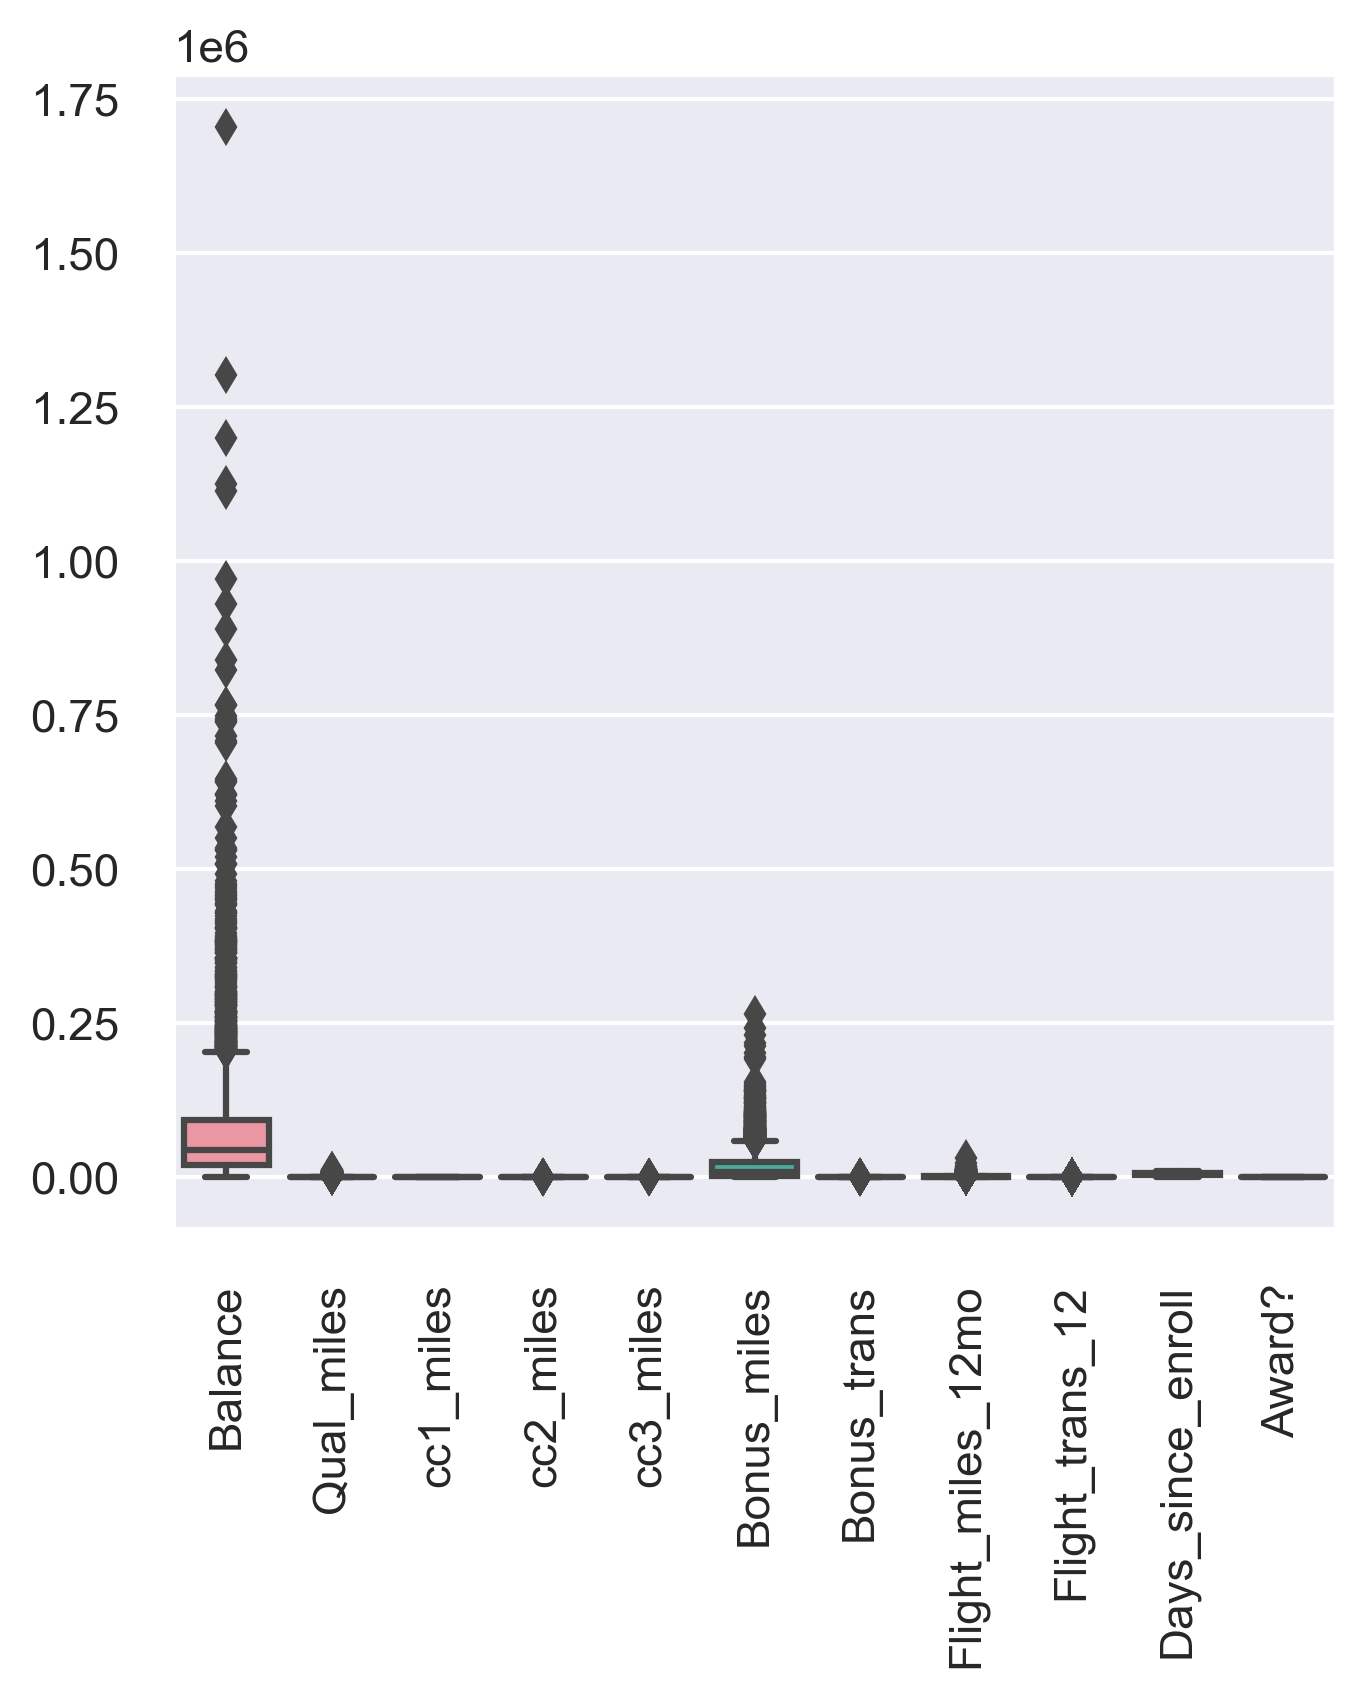

In [53]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

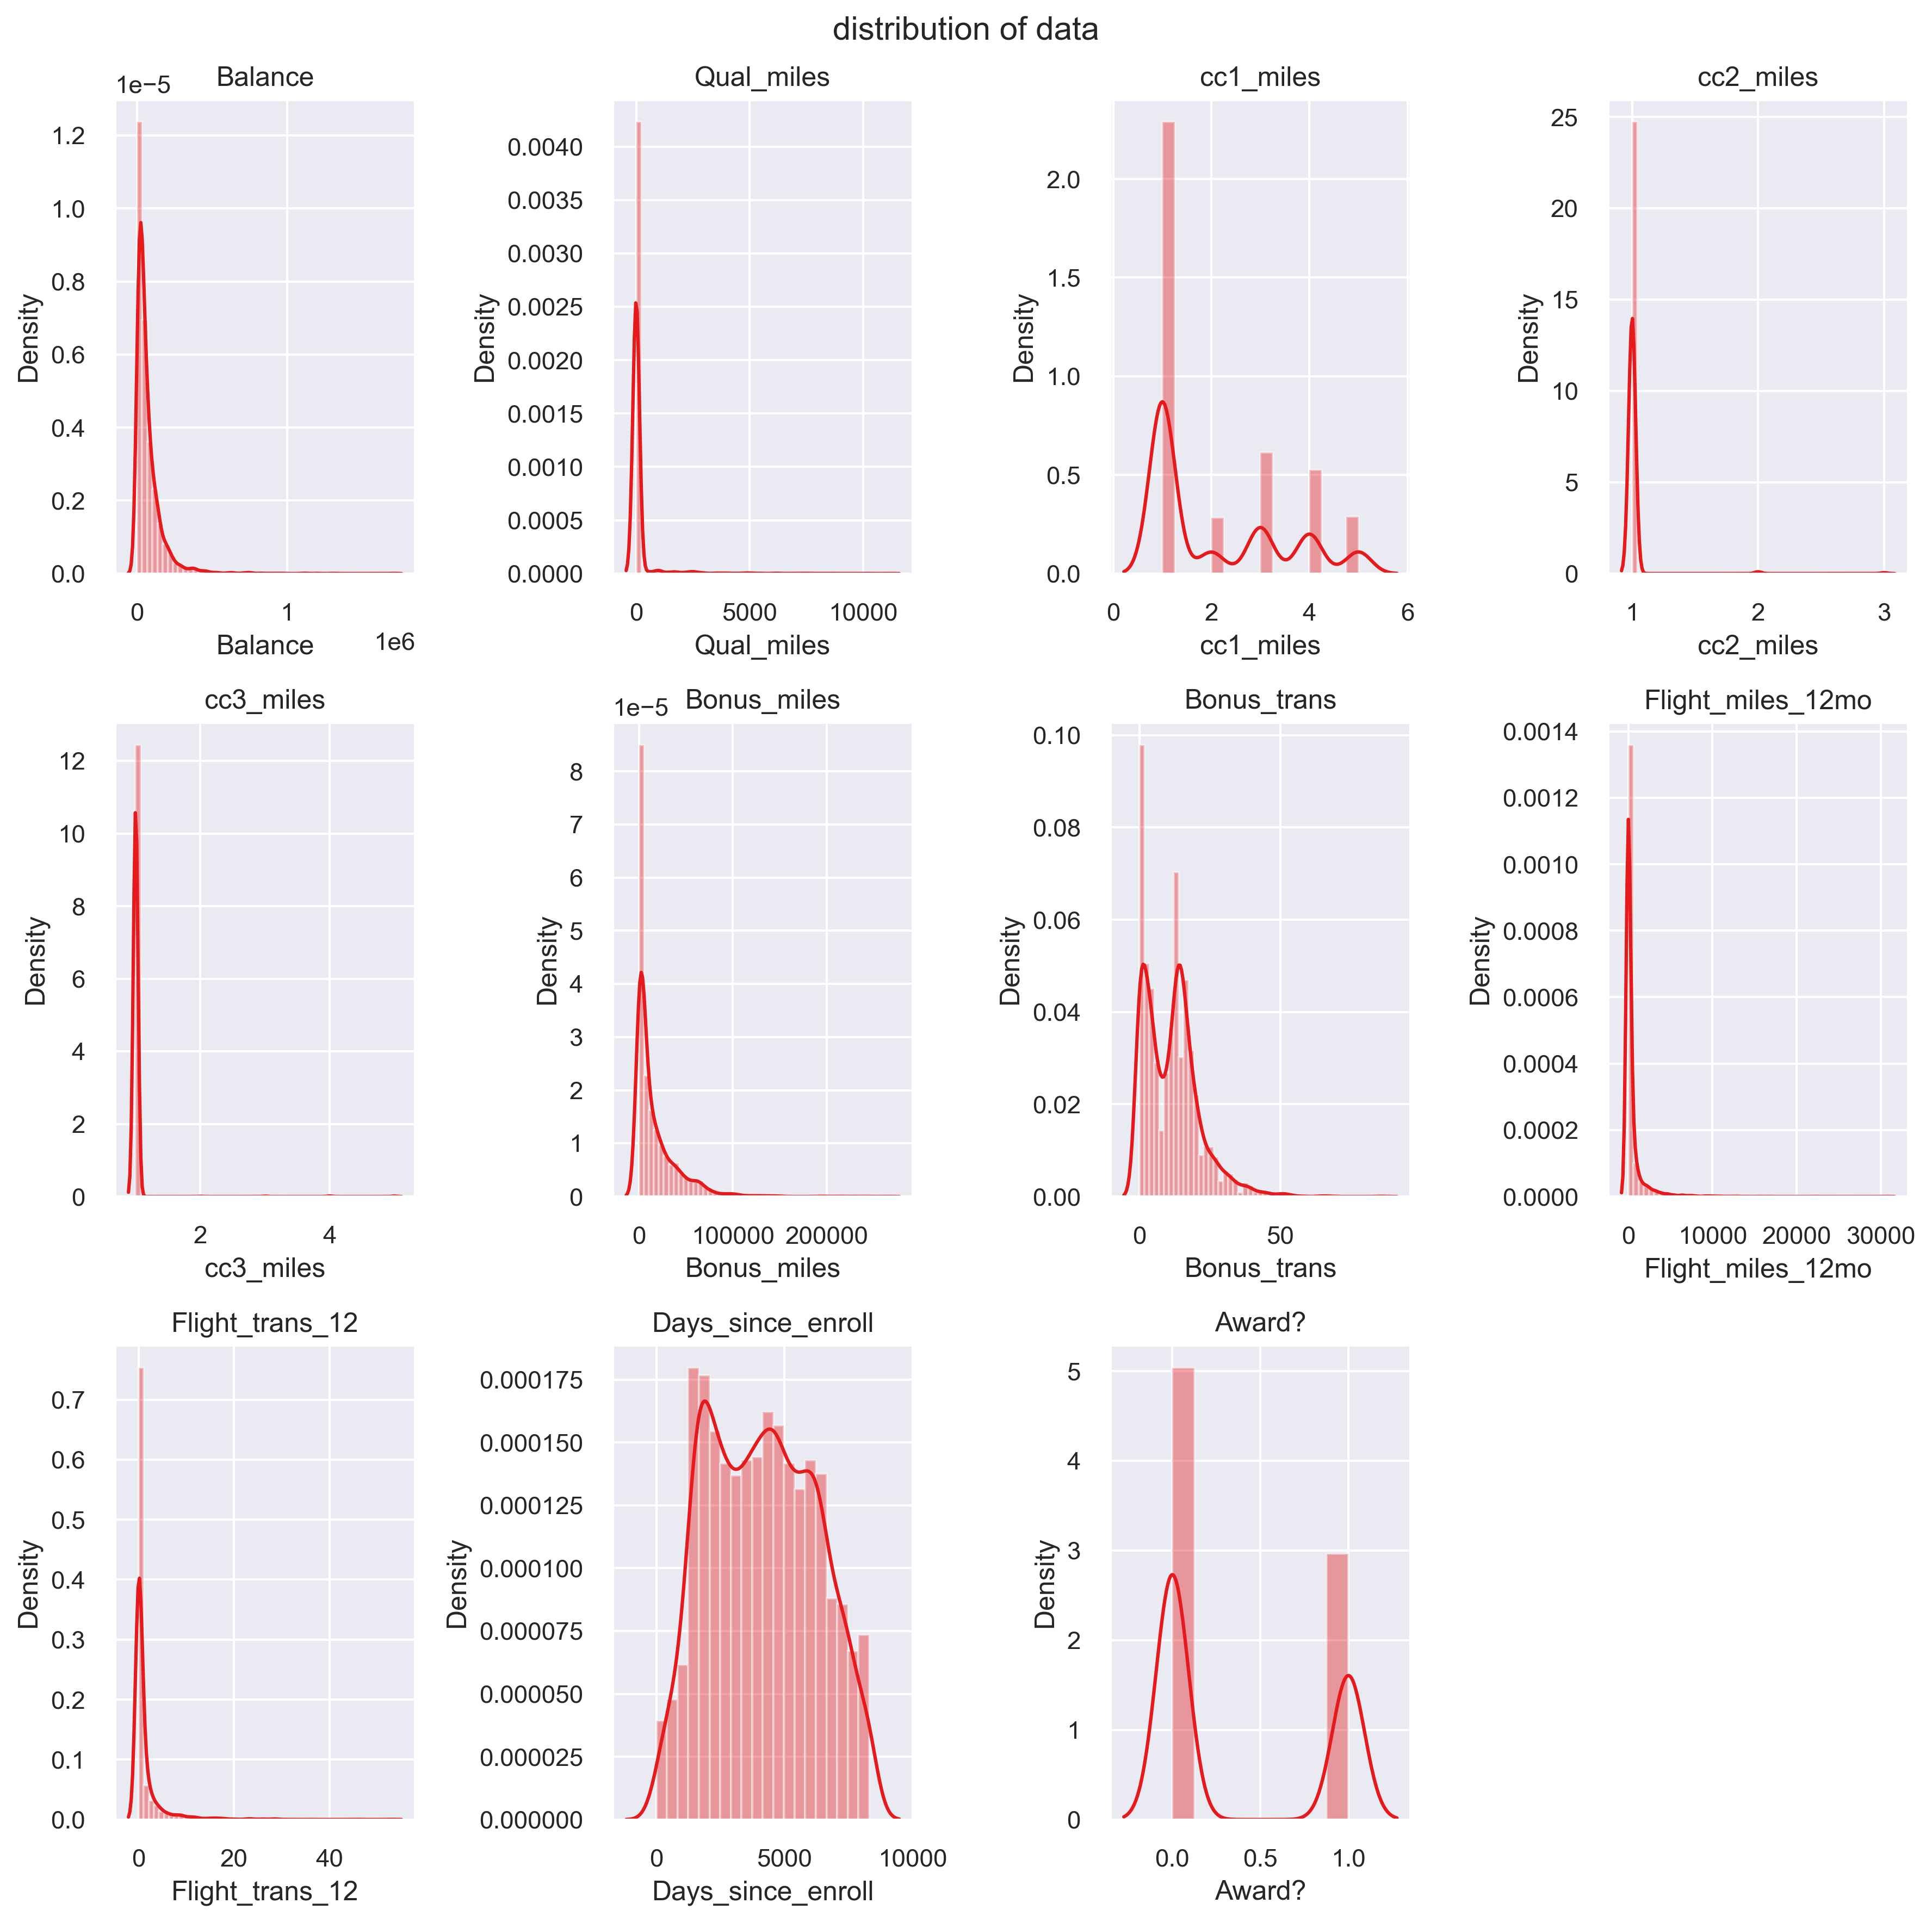

In [54]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of data")
for i in df.loc[:,:]:
    plt.subplot(3,4,k)
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

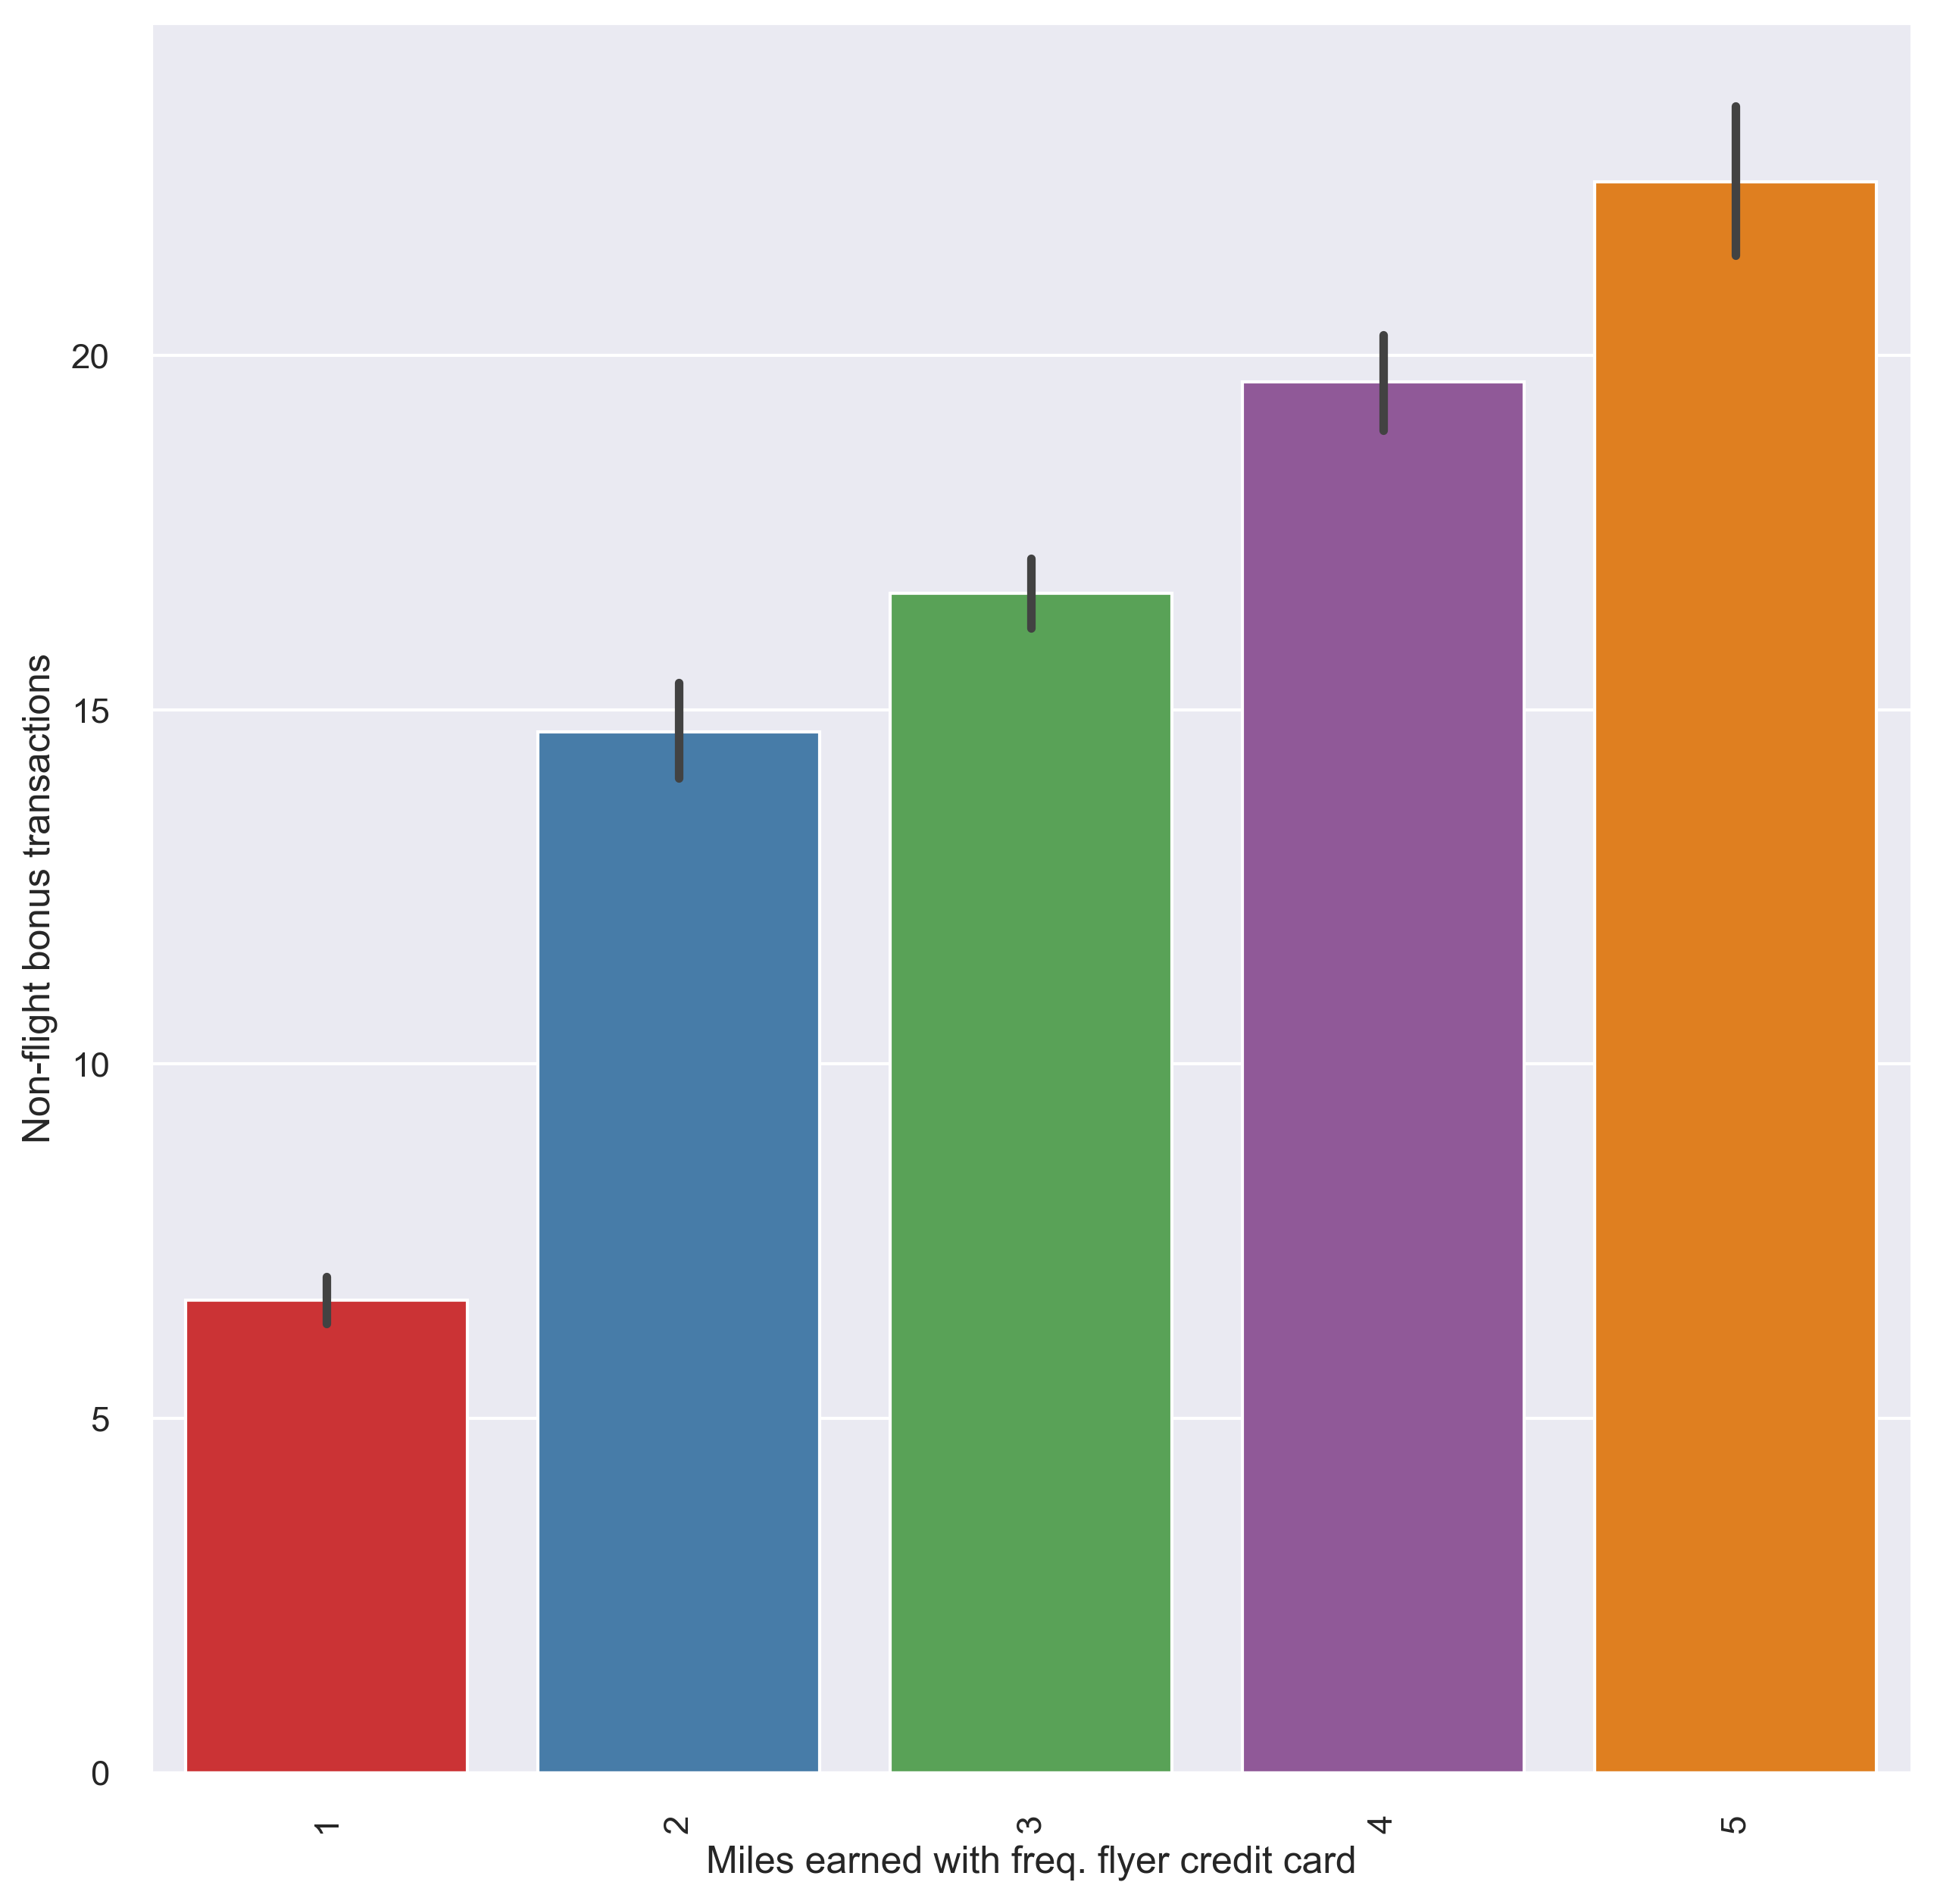

In [55]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [56]:
countNotermdeposit = len(df[df['Award?'] == 0])
counthavetermdeposit = len(df[df['Award?'] == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(df['Award?']))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(df['Award?']))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


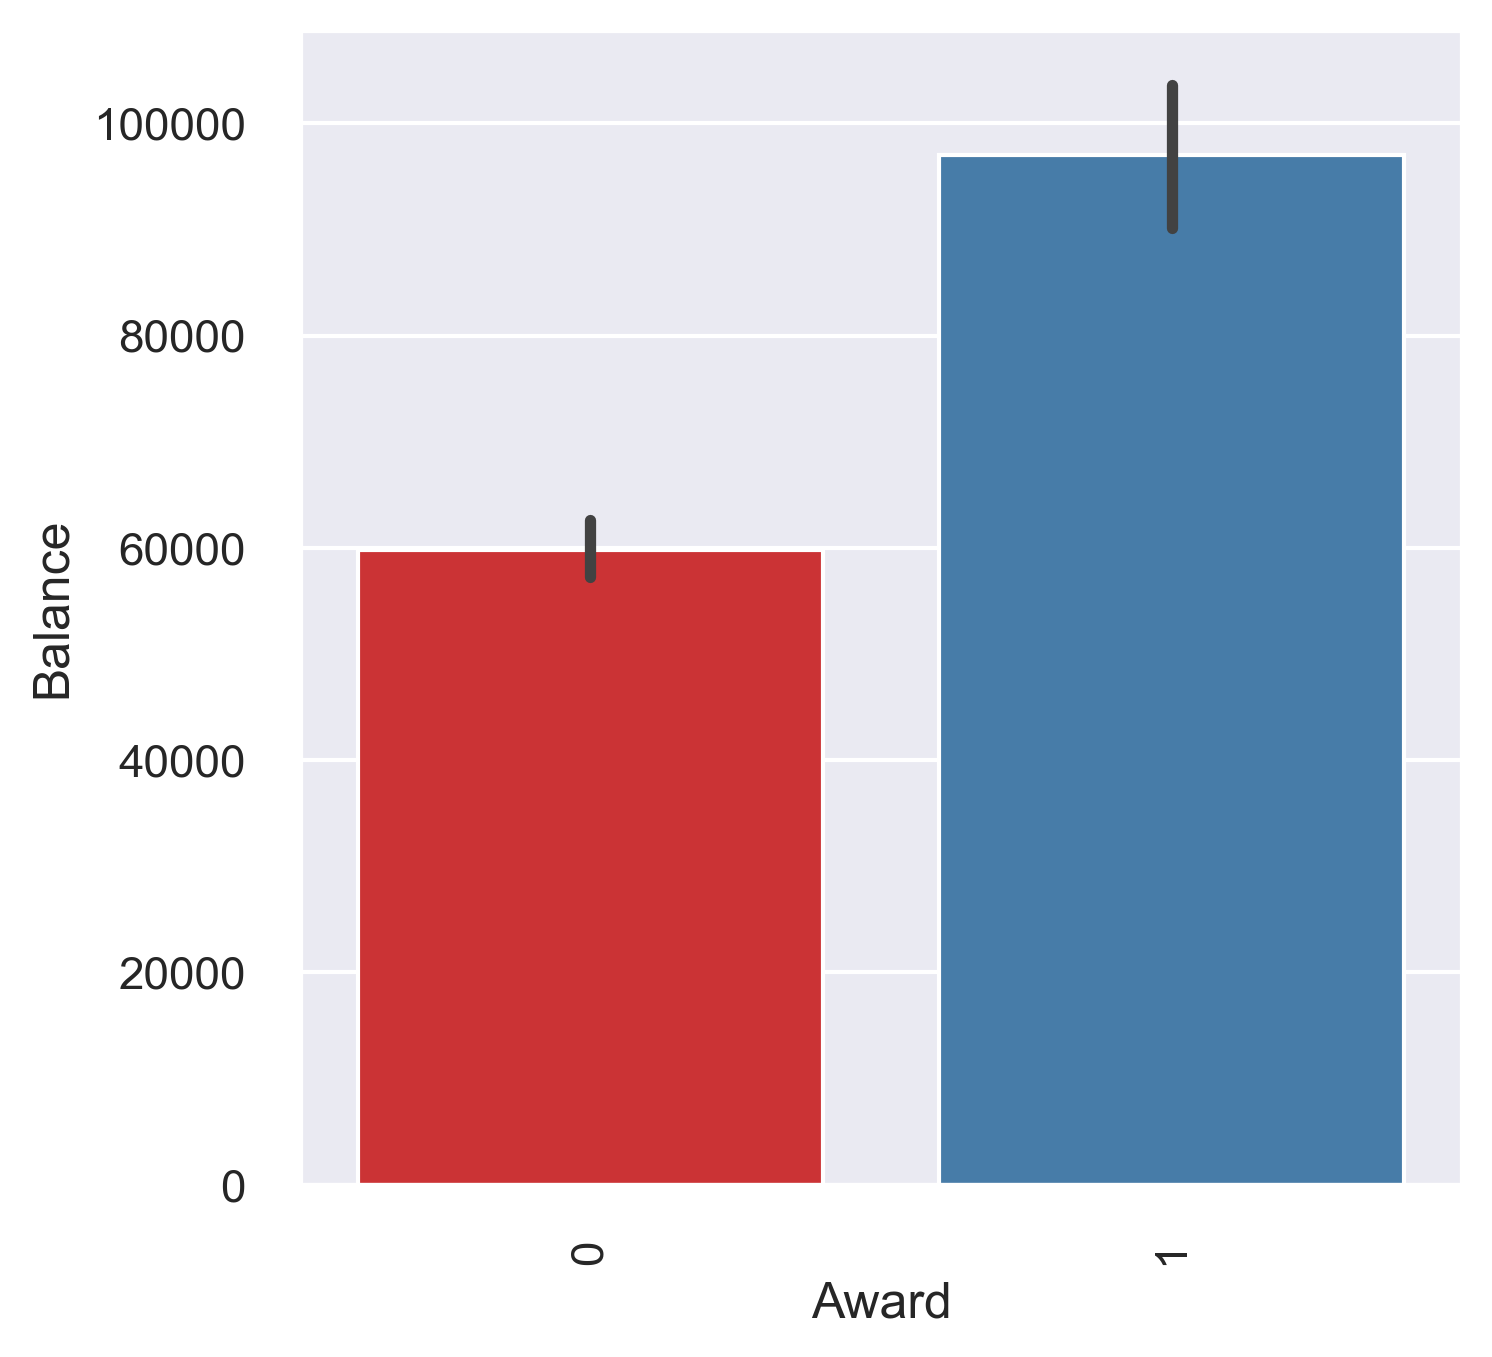

In [57]:
plt.figure(figsize = (5,5))
Balance = df[['Award?','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award?', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [58]:
corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award?               0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

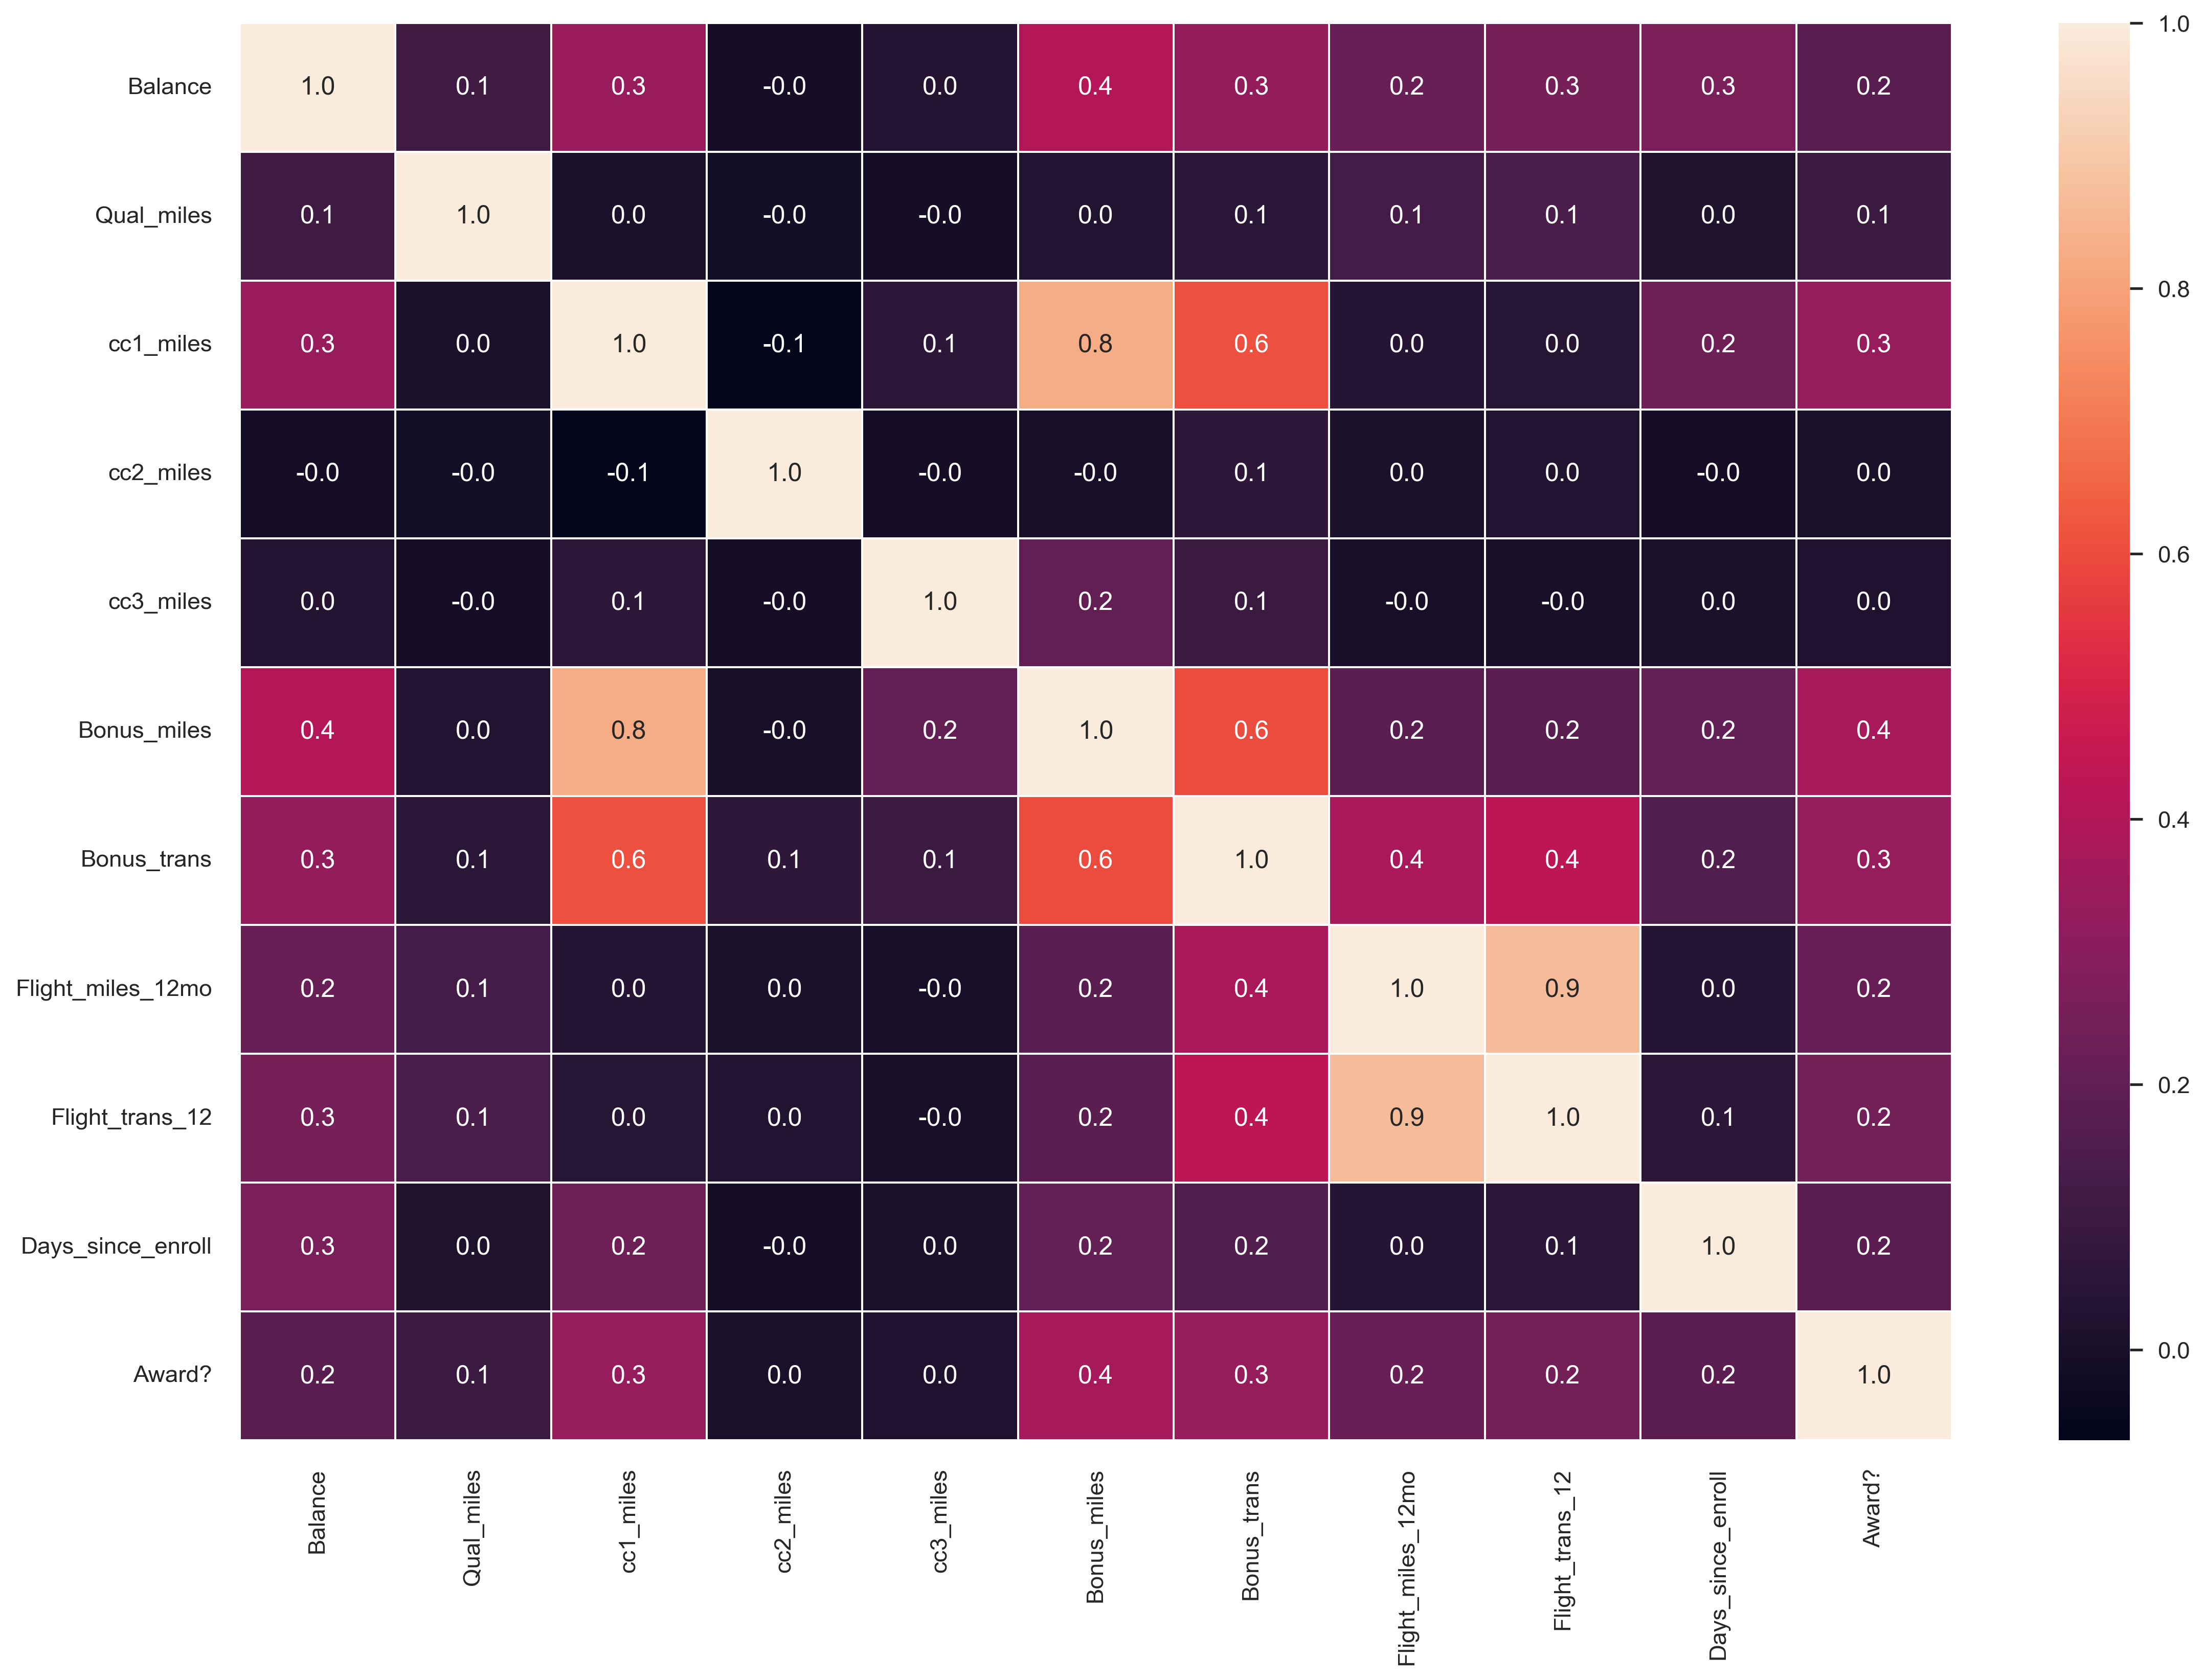

In [59]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

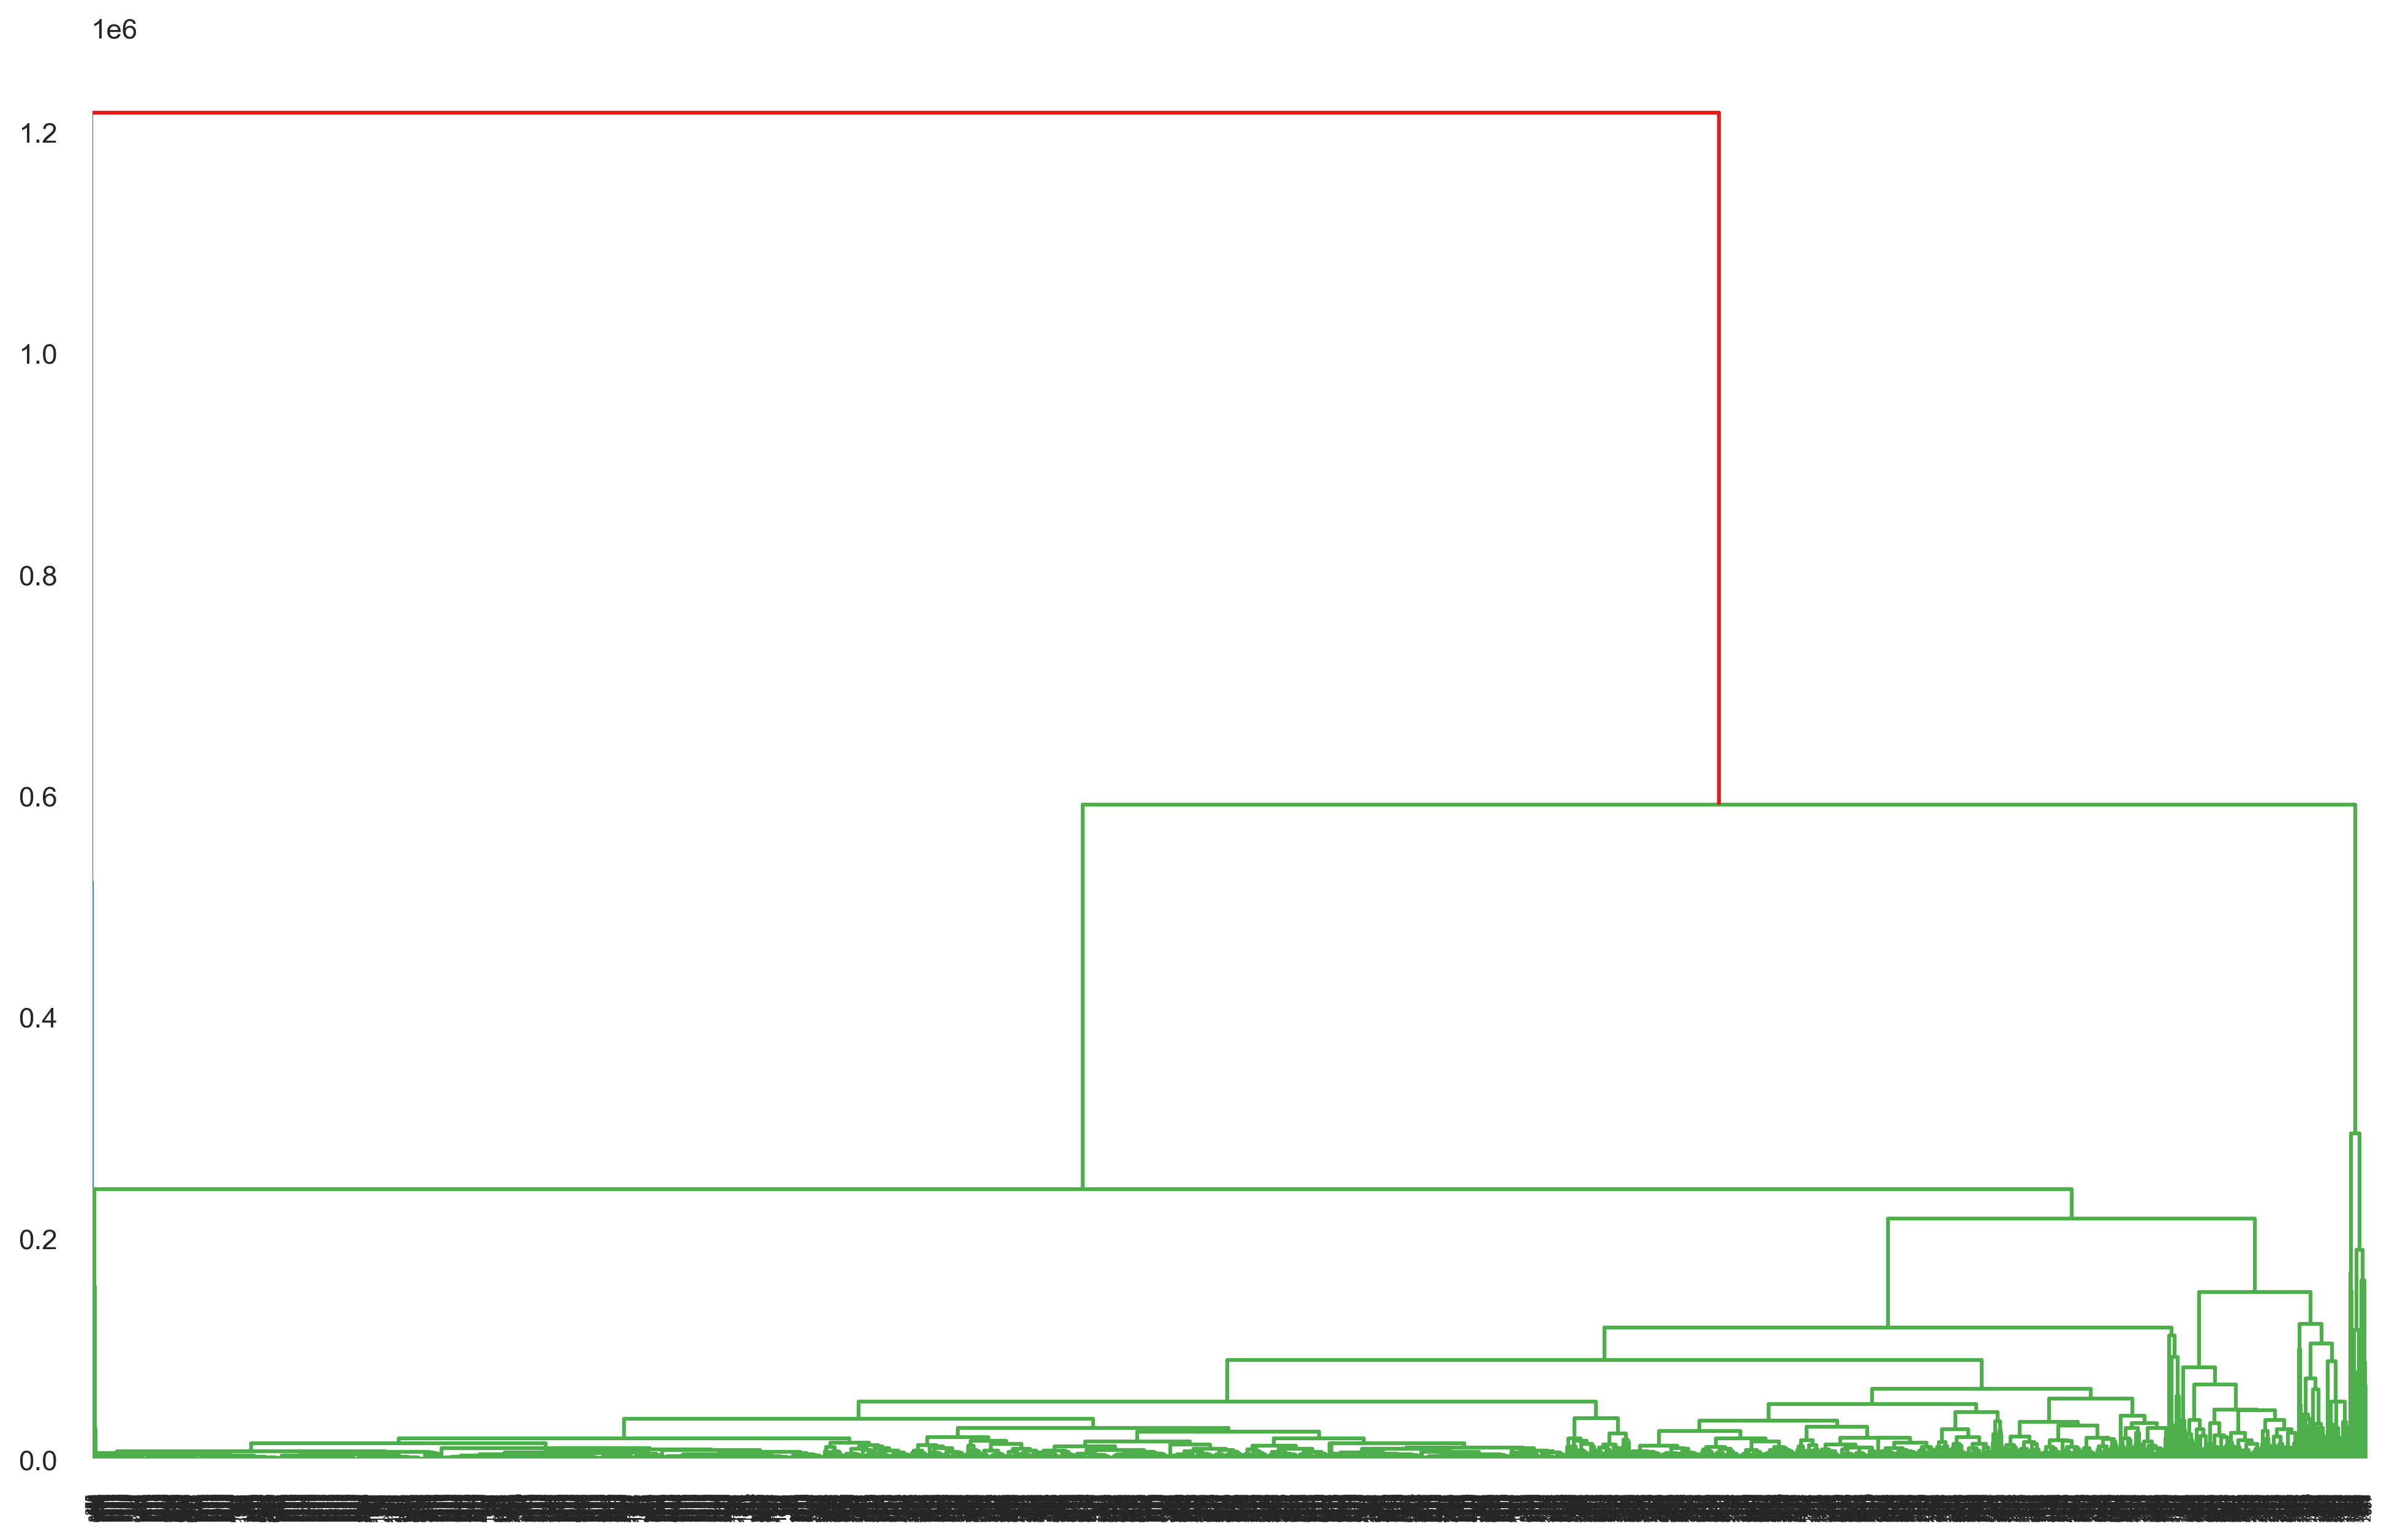

In [60]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df, method='average'))

In [61]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [62]:
# save clusters for chart
y_hc = hc.fit_predict(df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

Clusters
0            0
1            0
2            0
3            0
4            0
...        ...
3994         0
3995         0
3996         0
3997         0
3998         0

[3999 rows x 1 columns]

In [63]:
airlines = pd.concat([df,Clusters], axis=1)

In [64]:
airlines

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2     19244.0         0.0        1.0        1.0        1.0        215.0   
3     41354.0         0.0        1.0        1.0        1.0       4123.0   
4     14776.0         0.0        1.0        1.0        1.0        500.0   
5     97752.0         0.0        4.0        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
2419      NaN         NaN        NaN        NaN        NaN          NaN   
2639      NaN         NaN        NaN        NaN        NaN          NaN   
2716      NaN         NaN        NaN        NaN        NaN          NaN   
2718      NaN         NaN        NaN        NaN        NaN          NaN   
3259      NaN         NaN        NaN        NaN        NaN          NaN   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
1             1.0                0.0              0.0             7000.0   
2             2.0                0.0              0.0             6968.0   
3             4.0                0.0              0.0             7034.0   
4             1.0                0.0              0.0             6952.0   
5            26.0             2077.0              4.0             6935.0   
...           ...                ...              ...                ...   
2419          NaN                NaN              NaN                NaN   
2639          NaN                NaN              NaN                NaN   
2716          NaN                NaN              NaN                NaN   
2718          NaN                NaN              NaN                NaN   
3259          NaN                NaN              NaN                NaN   

      Award?  Clusters  
1        0.0       0.0  
2        0.0       0.0  
3        0.0       0.0  
4        0.0       0.0  
5        1.0       0.0  
...      ...       ...  
2419     NaN       0.0  
2639     NaN       0.0  
2716     NaN       0.0  
2718     NaN       0.0  
3259     NaN       0.0  

[4022 rows x 12 columns]

In [65]:
airlines.sort_values("Clusters")

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2678  27438.0         0.0        1.0        1.0        1.0       2528.0   
2679  14748.0         0.0        1.0        1.0        1.0       2210.0   
2680  49514.0         0.0        1.0        1.0        1.0       4500.0   
2681   7457.0         0.0        1.0        1.0        1.0      17131.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0         0.0        1.0        1.0        1.0       8525.0   
4018  64385.0         0.0        1.0        1.0        1.0        981.0   
4019  73597.0         0.0        3.0        1.0        1.0      25447.0   
4020  54899.0         0.0        1.0        1.0        1.0        500.0   
4021   3016.0         0.0        1.0        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
1             1.0                0.0              0.0             7000.0   
2678          6.0             2528.0              6.0             2490.0   
2679          7.0                0.0              0.0             2497.0   
2680         22.0                0.0              0.0             2569.0   
2681          5.0                0.0              0.0             2496.0   
...           ...                ...              ...                ...   
4017          4.0              200.0              1.0             1403.0   
4018          5.0                0.0              0.0             1395.0   
4019          8.0                0.0              0.0             1402.0   
4020          1.0              500.0              1.0             1401.0   
4021          0.0                0.0              0.0             1398.0   

      Award?  Clusters  
1        0.0       0.0  
2678     0.0       0.0  
2679     1.0       0.0  
2680     0.0       0.0  
2681     1.0       0.0  
...      ...       ...  
4017     1.0       NaN  
4018     1.0       NaN  
4019     1.0       NaN  
4020     0.0       NaN  
4021     0.0       NaN  

[4022 rows x 12 columns]

In [66]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=14, random_state=0)

In [67]:
kmeans.inertia_

1841543617565.6873

In [68]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[42961820046587.05,
 20823632642041.96,
 11789152716591.457,
 7549630961801.5,
 5724534080291.383,
 4541450673874.507,
 3697650531971.043,
 3274444604278.725,
 2901855404997.8506,
 2625541177335.4907,
 2390220640301.128,
 2140955377567.307,
 1969262451661.1785,
 1841543617565.6873,
 1693202436737.6848,
 1576803270182.3218,
 1482154881425.4124,
 1376876985840.8574]

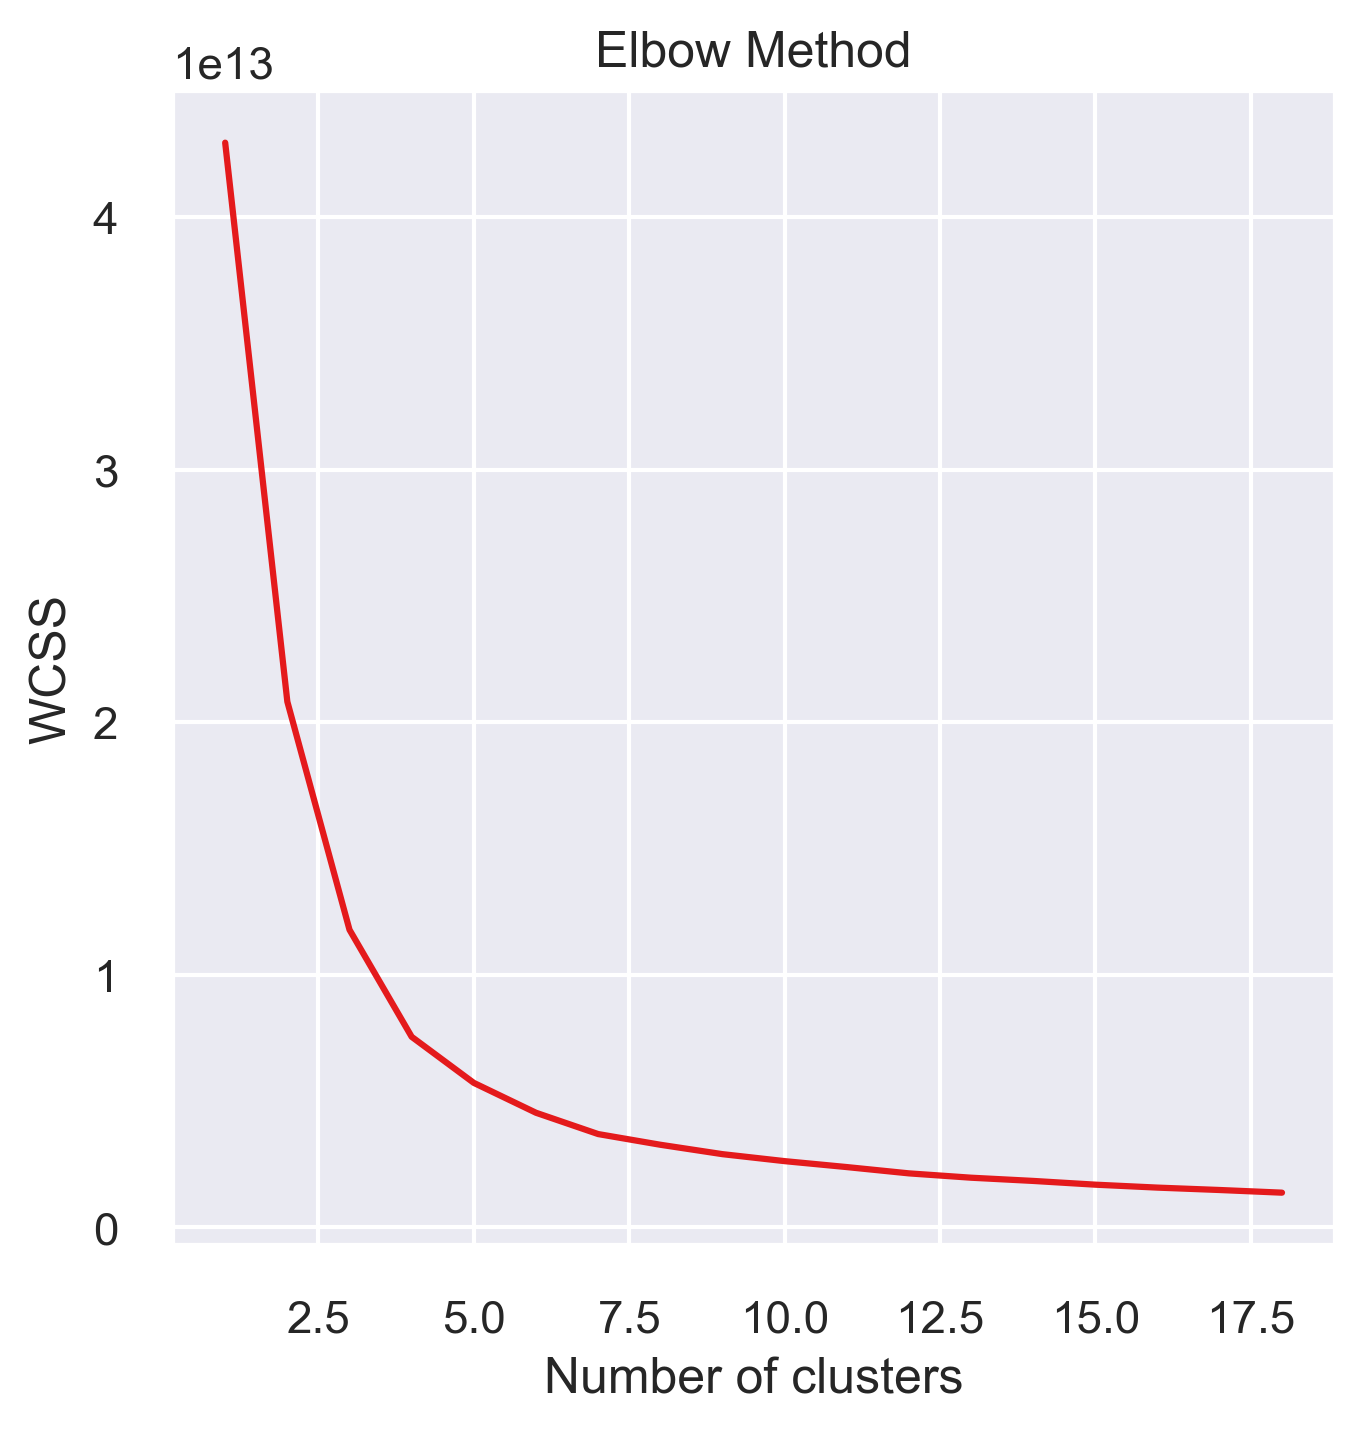

In [69]:
plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(df)

KMeans(n_clusters=7, random_state=0)

In [71]:
clusters_new.labels_

array([3, 3, 3, ..., 0, 0, 3])

In [72]:
df.head(5)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               2077                4               6935   

     Award?  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1

In [73]:
a=df.values
a

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [74]:
stscaler = StandardScaler().fit(a)
X1 = stscaler.transform(a)

In [75]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(X1)

DBSCAN(eps=0.82, min_samples=6)

In [76]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [77]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [78]:
airlines2 = pd.concat([df,cl],axis=1)

In [79]:
airlines2

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2     19244.0         0.0        1.0        1.0        1.0        215.0   
3     41354.0         0.0        1.0        1.0        1.0       4123.0   
4     14776.0         0.0        1.0        1.0        1.0        500.0   
5     97752.0         0.0        4.0        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
2419      NaN         NaN        NaN        NaN        NaN          NaN   
2639      NaN         NaN        NaN        NaN        NaN          NaN   
2716      NaN         NaN        NaN        NaN        NaN          NaN   
2718      NaN         NaN        NaN        NaN        NaN          NaN   
3259      NaN         NaN        NaN        NaN        NaN          NaN   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
1             1.0                0.0              0.0             7000.0   
2             2.0                0.0              0.0             6968.0   
3             4.0                0.0              0.0             7034.0   
4             1.0                0.0              0.0             6952.0   
5            26.0             2077.0              4.0             6935.0   
...           ...                ...              ...                ...   
2419          NaN                NaN              NaN                NaN   
2639          NaN                NaN              NaN                NaN   
2716          NaN                NaN              NaN                NaN   
2718          NaN                NaN              NaN                NaN   
3259          NaN                NaN              NaN                NaN   

      Award?  Cluster  
1        0.0      0.0  
2        0.0      0.0  
3        0.0      0.0  
4        0.0     -1.0  
5        1.0      0.0  
...      ...      ...  
2419     NaN      0.0  
2639     NaN      0.0  
2716     NaN      1.0  
2718     NaN      1.0  
3259     NaN      0.0  

[4022 rows x 12 columns]

In [80]:
airlines2['Cluster'].value_counts()

 0.0    2222
 1.0     956
-1.0     801
 2.0      13
 3.0       7
Name: Cluster, dtype: int64

# crime_data

In [89]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\Excels\\assinments\\Clustering\\crime_data.csv")

In [90]:
df

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [88]:
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               2077                4               6935   

     Award?  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1

In [91]:
df.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [95]:
df.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [96]:
df.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

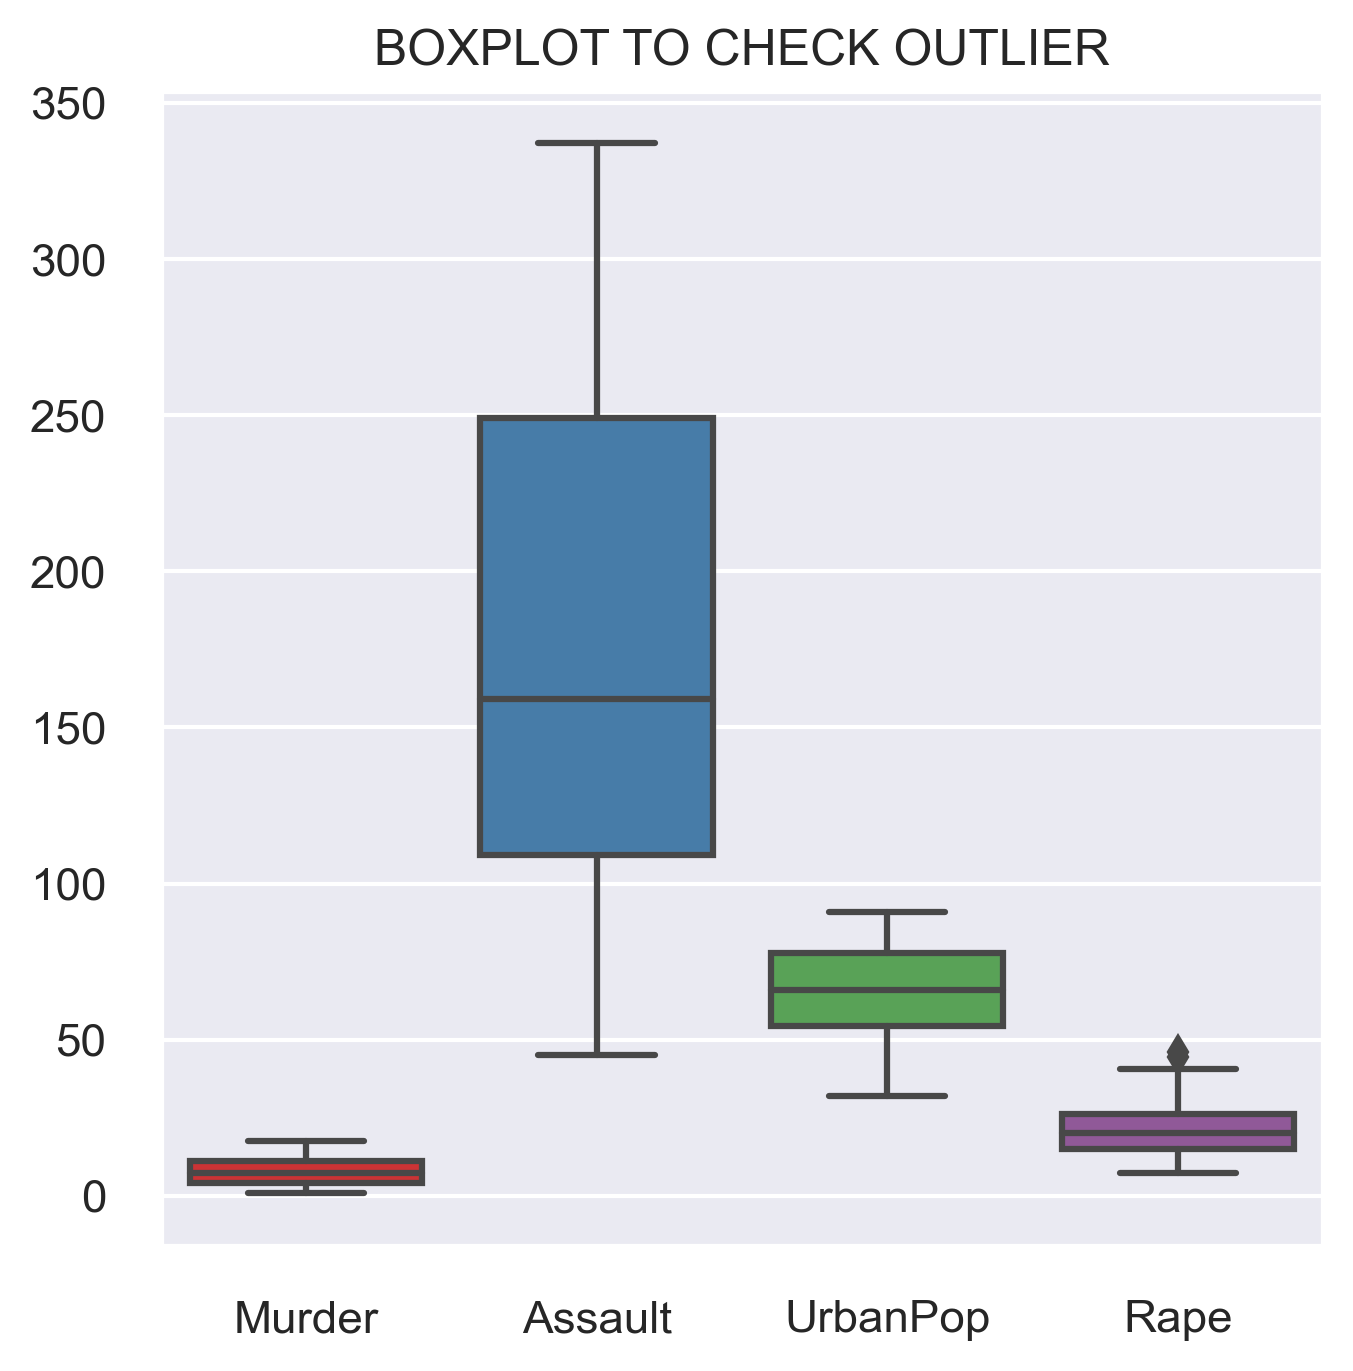

In [97]:
sns.boxplot(df)
plt.title('BOXPLOT TO CHECK OUTLIER')
plt.show()

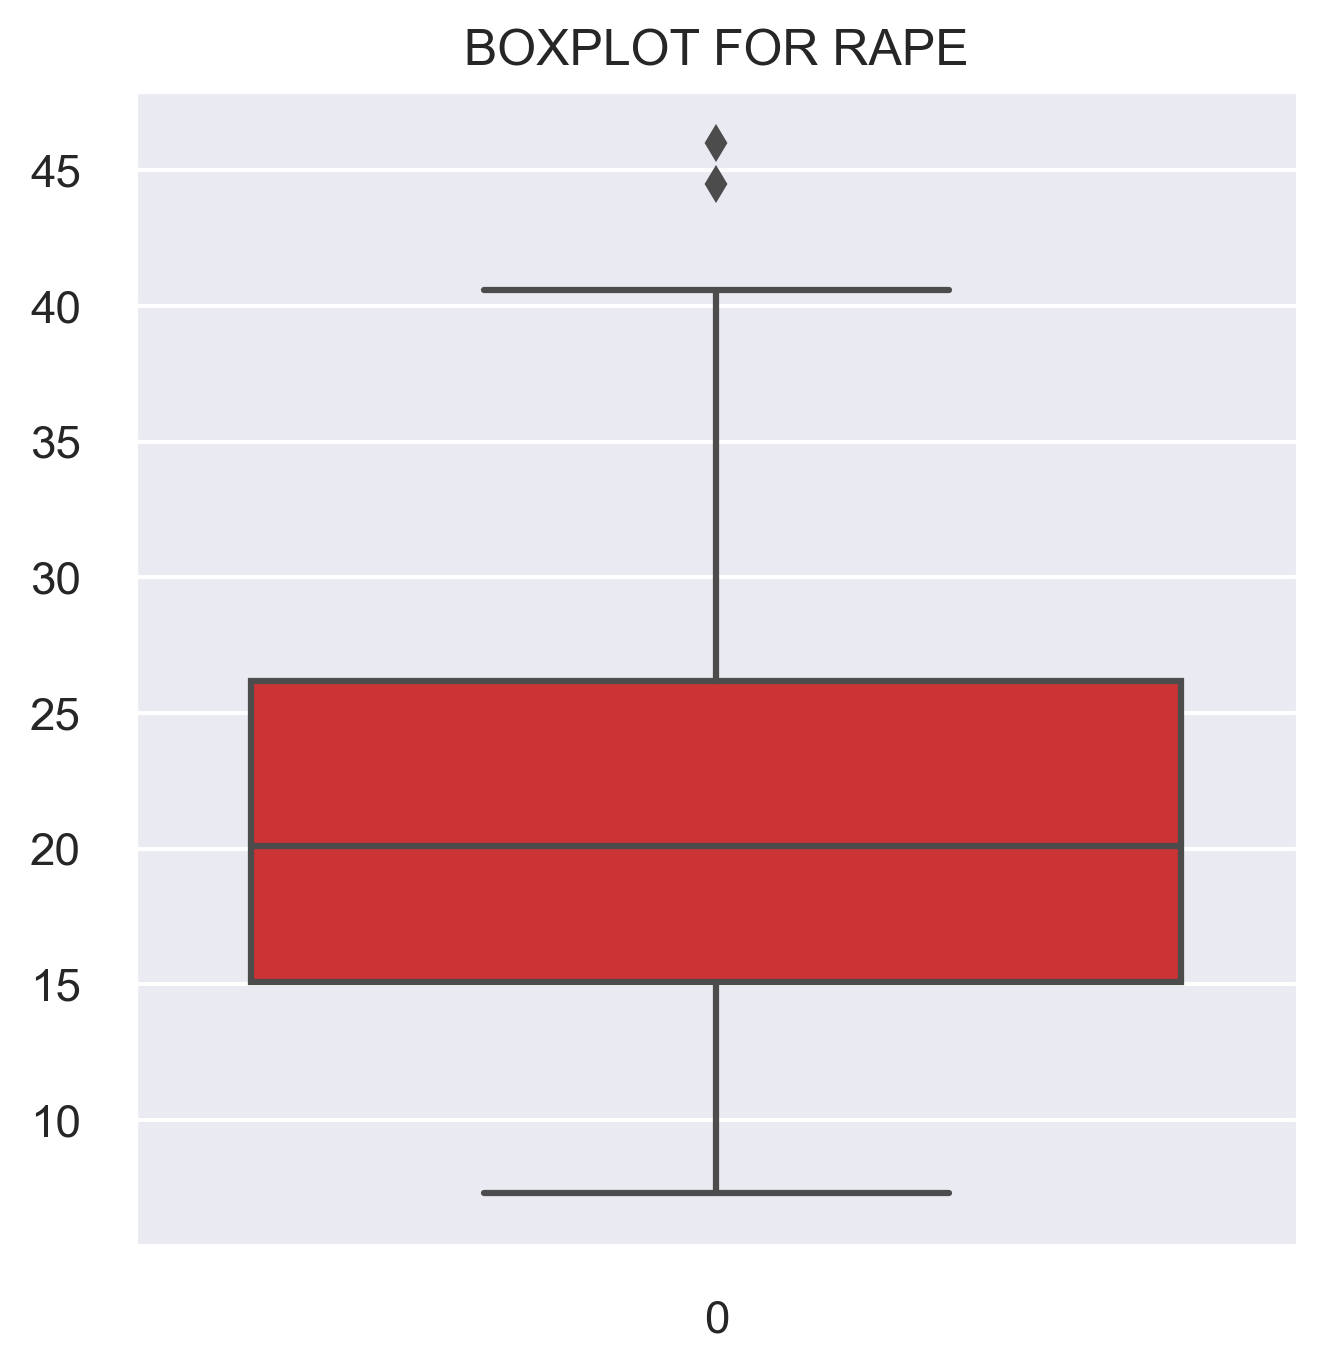

In [98]:
sns.boxplot(df['Rape'])
plt.title('BOXPLOT FOR RAPE')
plt.show()

Text(0.5, 1.05, 'PAIRPLOT FOR WHOLE DATASET')

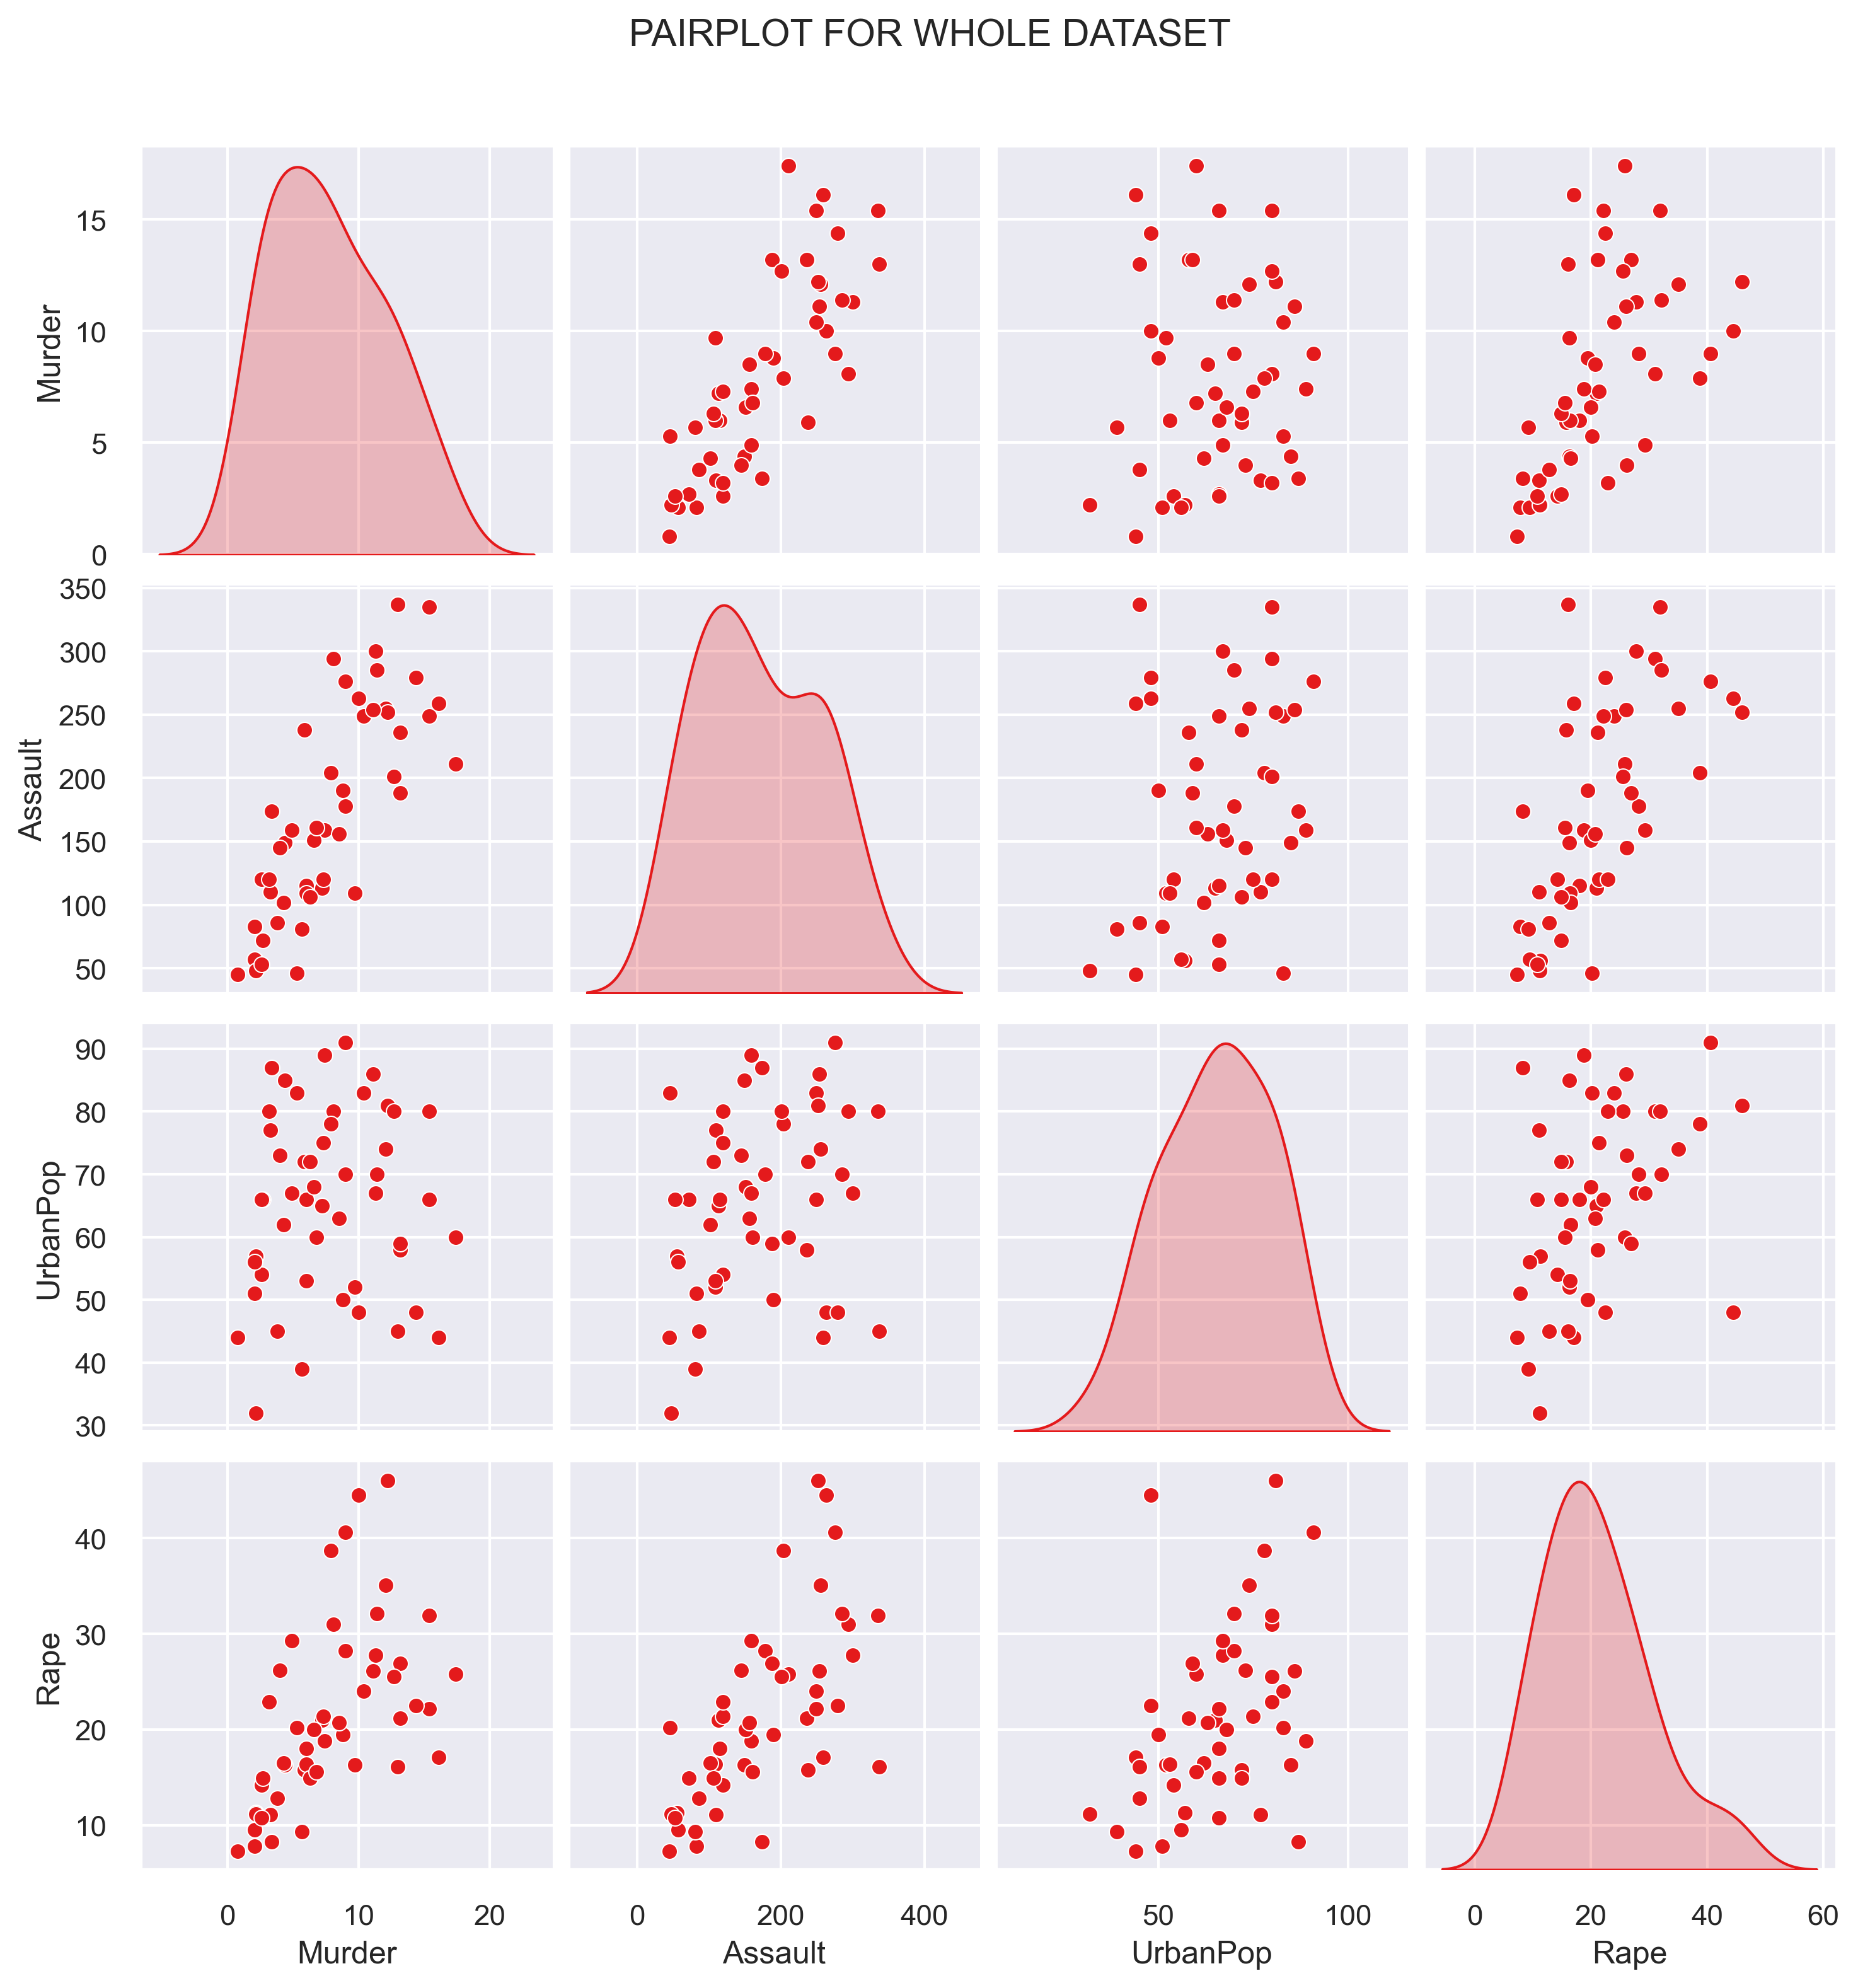

In [99]:
pp = sns.pairplot(df, diag_kind='kde')
pp.fig.suptitle('PAIRPLOT FOR WHOLE DATASET', y = 1.05)

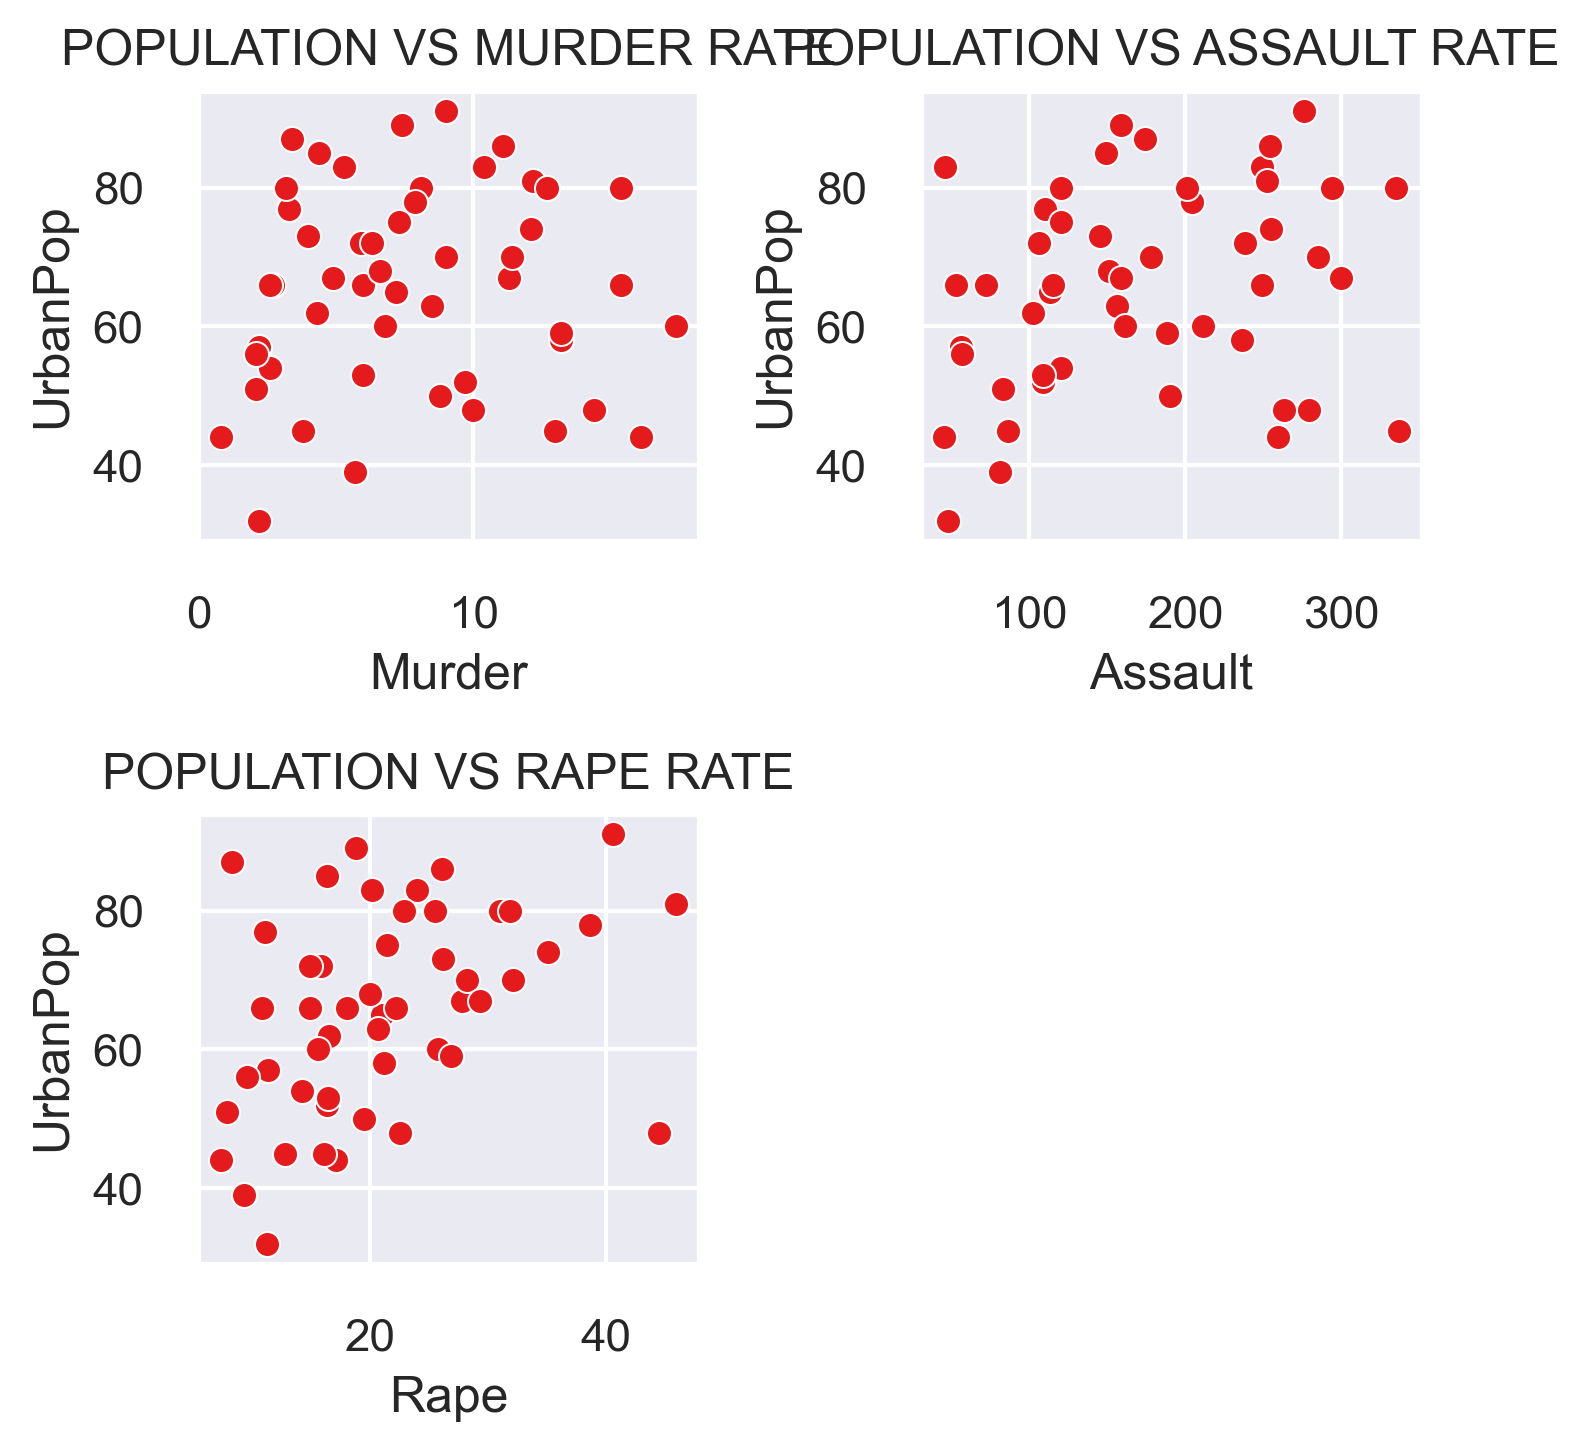

In [100]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
sns.scatterplot(data = df, y = 'UrbanPop', x = 'Murder')
plt.title('POPULATION VS MURDER RATE')
plt.subplot(2,2,2)
sns.scatterplot(data = df, y = 'UrbanPop', x = 'Assault')
plt.title('POPULATION VS ASSAULT RATE')
plt.subplot(2,2,3)
sns.scatterplot(data = df, y = 'UrbanPop', x = 'Rape')
plt.title('POPULATION VS RAPE RATE')
plt.tight_layout()

Text(0.5, 1.0, 'STATEWISE POPULATION')

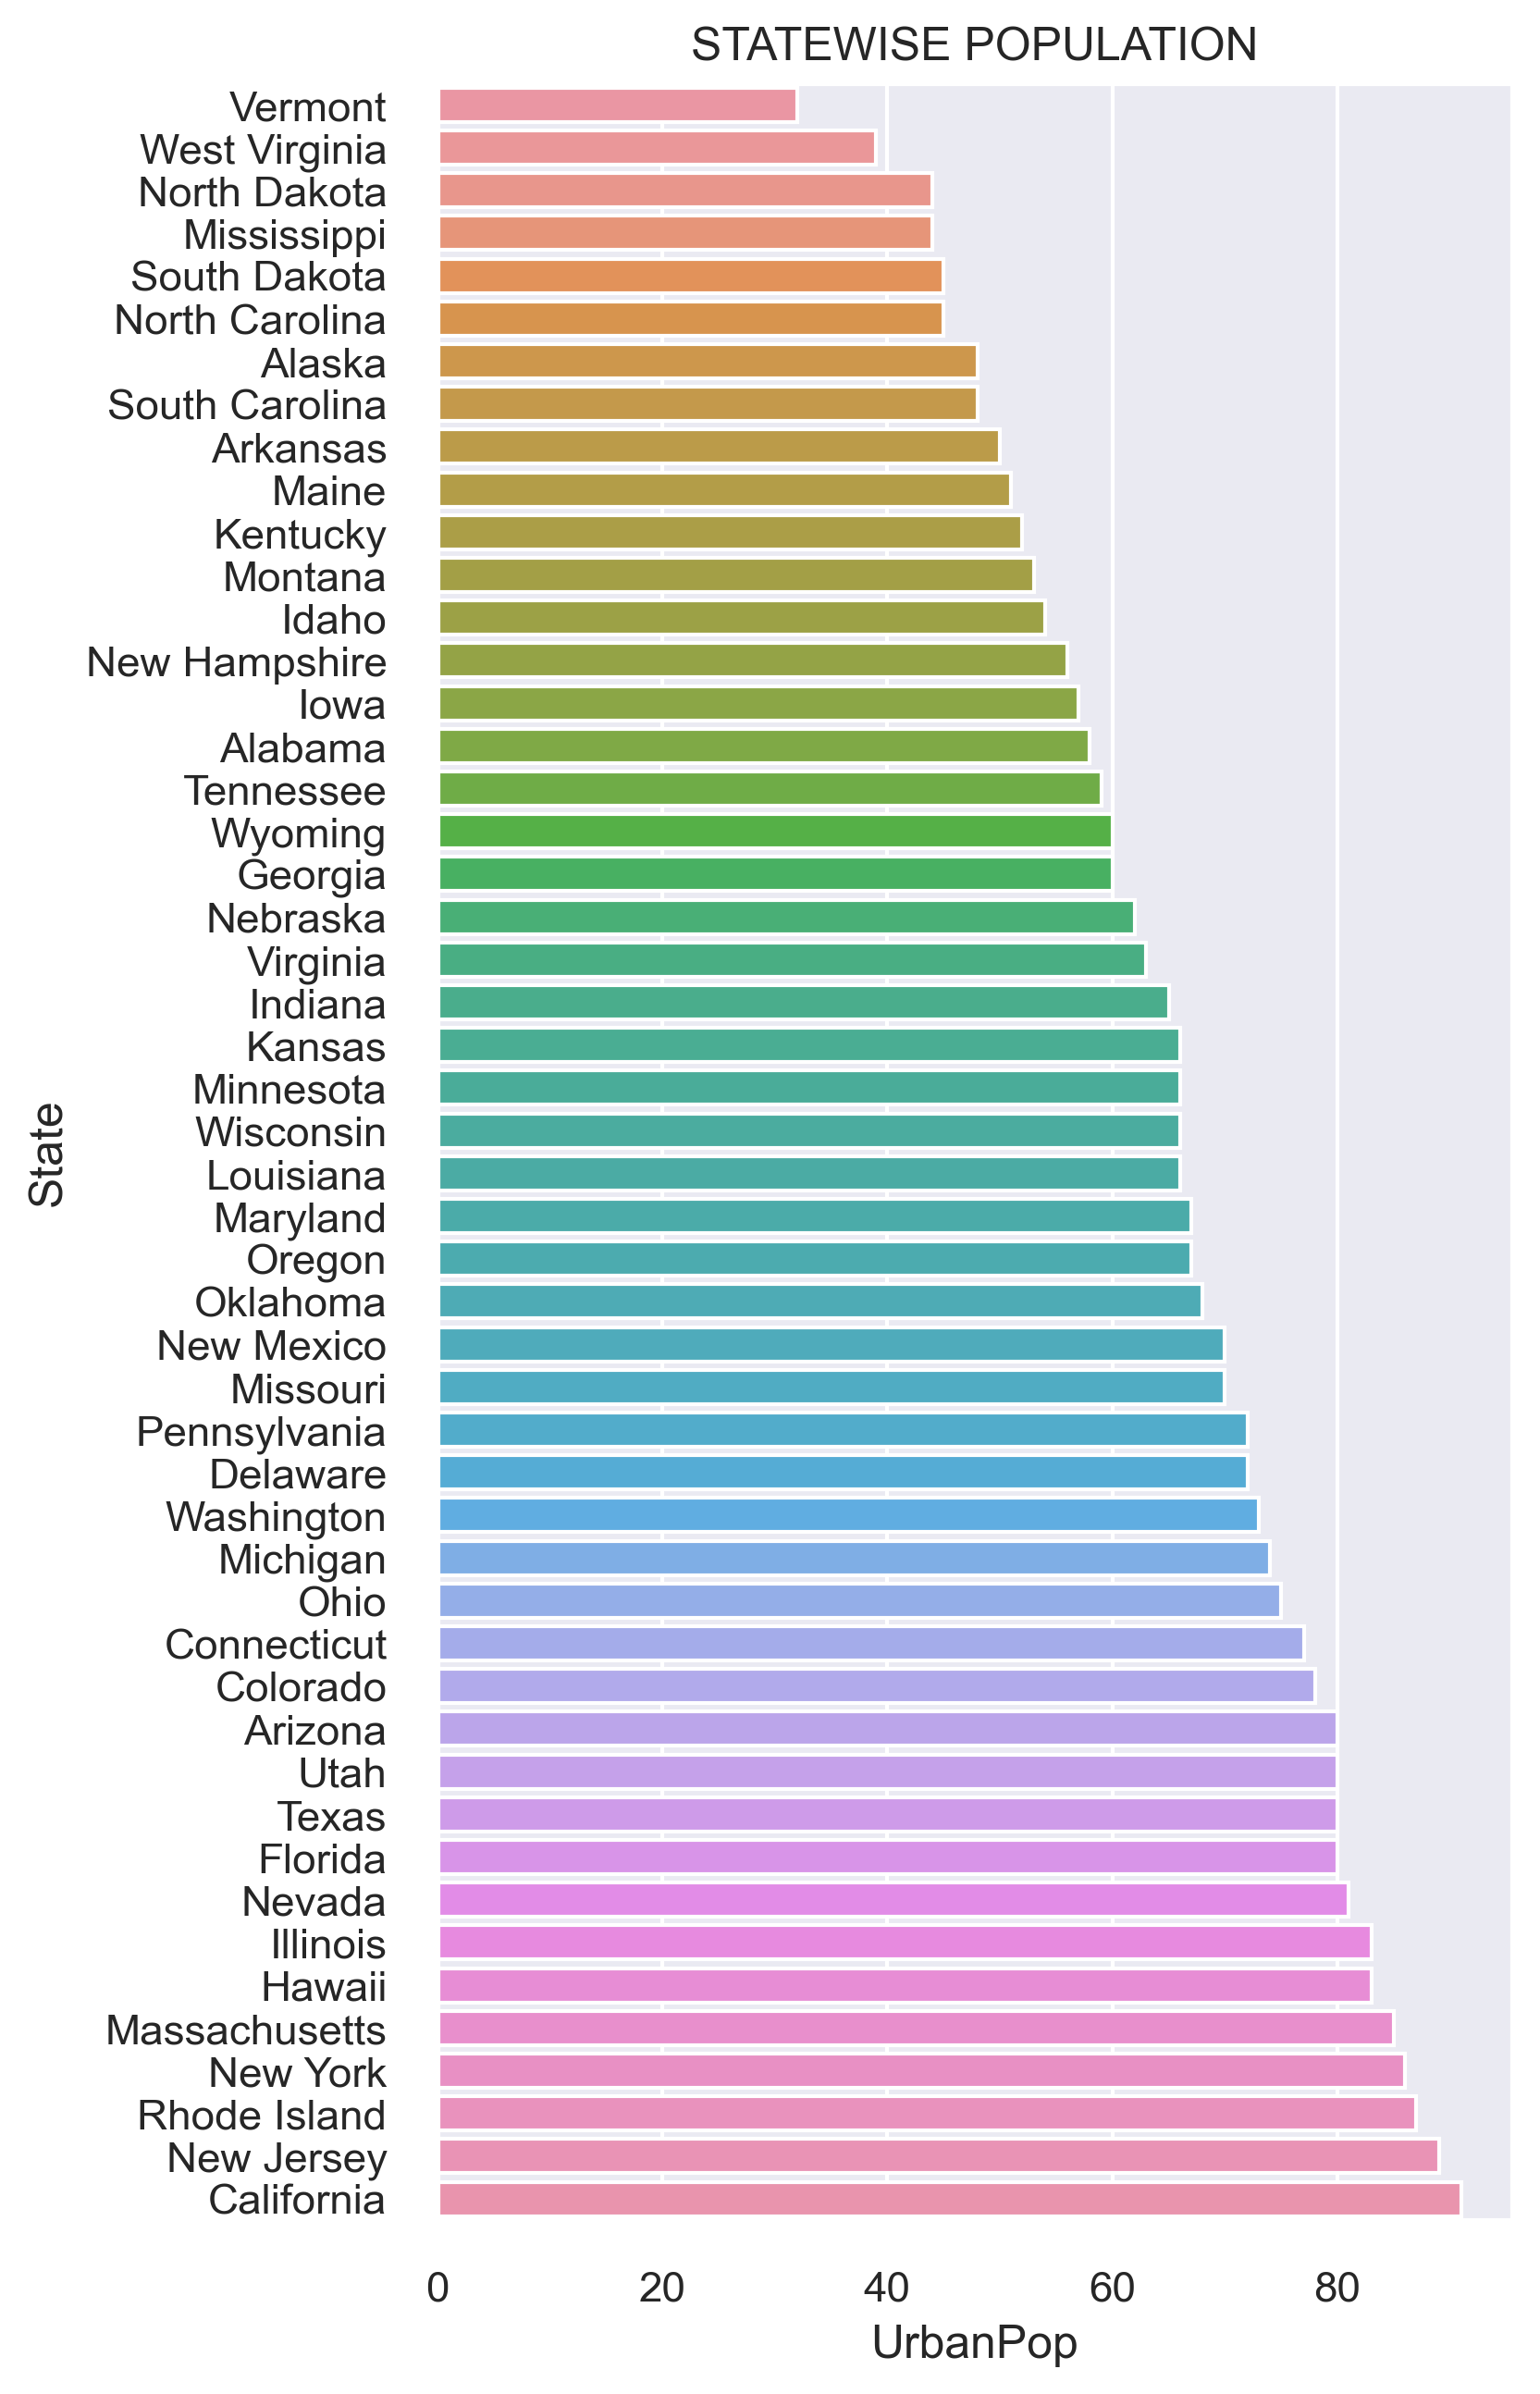

In [101]:
plt.figure(figsize=(5,10))
sns.barplot(data = df,x = 'UrbanPop', y = 'State', order=df.sort_values('UrbanPop').State)
plt.title('STATEWISE POPULATION')

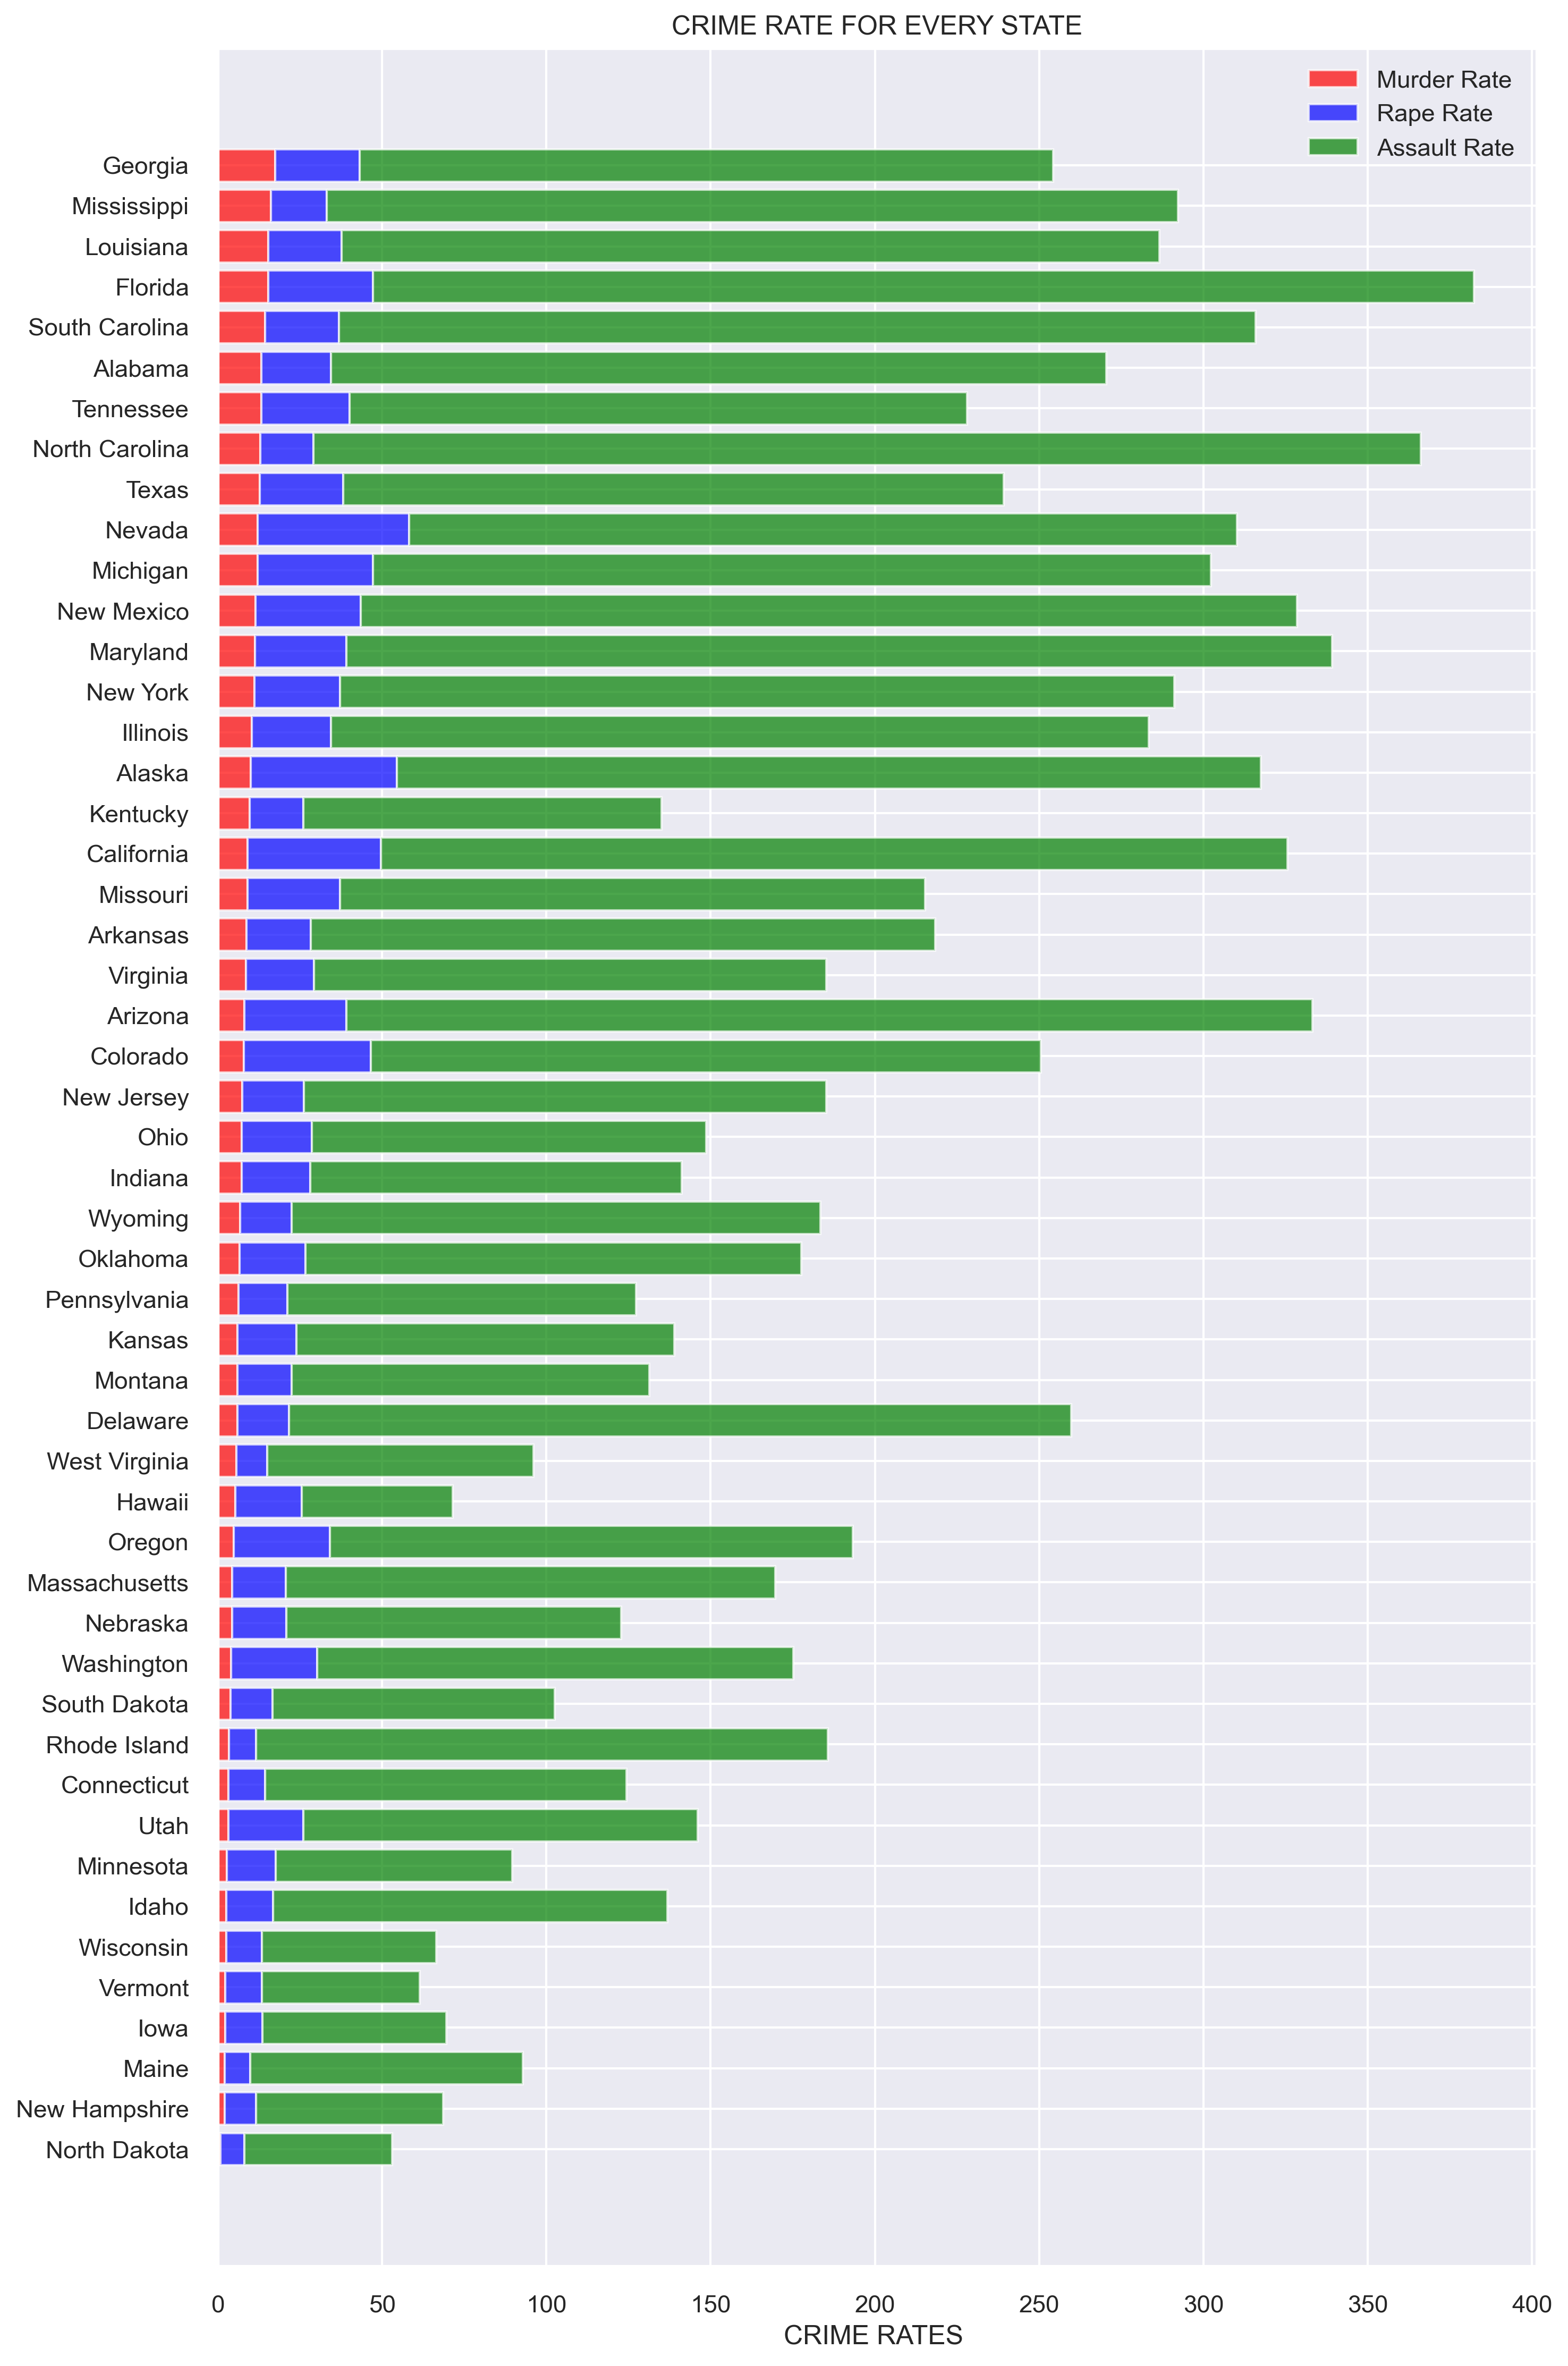

In [102]:
# Extract state names and rates

data_sorted = df.sort_values(by='Murder')

# Extract state names and rates
states = data_sorted['State']
murder_rates = data_sorted['Murder']
rape_rates = data_sorted['Rape']
assault_rates = data_sorted['Assault']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 15))
# Plot murder rates
ax.barh(states, murder_rates, color='red', alpha=0.7, label='Murder Rate')
# Plot rape rates
ax.barh(states, rape_rates, left=murder_rates, color='blue', alpha=0.7, label='Rape Rate')
# Plot assault rates
ax.barh(states, assault_rates, left=[a + b for a, b in zip(murder_rates, rape_rates)], color='green', alpha=0.7, label='Assault Rate')

# Add labels and legend
ax.set_xlabel('CRIME RATES ')
ax.set_title('CRIME RATE FOR EVERY STATE')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [103]:
print('MAX ASSAULT RATE\n',df.iloc[df['Assault'].argmax()])
print('\nMIN ASSAULT RATE\n',df.iloc[df['Assault'].argmin()])

print('MAX MURDER RATE\n',df.iloc[df['Murder'].argmax()])
print('\nMIN MURDER RATE\n',df.iloc[df['Murder'].argmin()])

print('MAX RAPE RATE\n',df.iloc[df['Rape'].argmax()])
print('\nMIN RAPE RATE\n',df.iloc[df['Rape'].argmin()])

MAX ASSAULT RATE
 State       North Carolina
Murder                13.0
Assault                337
UrbanPop                45
Rape                  16.1
Name: 32, dtype: object

MIN ASSAULT RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object
MAX MURDER RATE
 State       Georgia
Murder         17.4
Assault         211
UrbanPop         60
Rape           25.8
Name: 9, dtype: object

MIN MURDER RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object
MAX RAPE RATE
 State       Nevada
Murder        12.2
Assault        252
UrbanPop        81
Rape          46.0
Name: 27, dtype: object

MIN RAPE RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object


In [104]:
sc = StandardScaler()
x = df.drop('State',axis = 1)
x = sc.fit_transform(x)

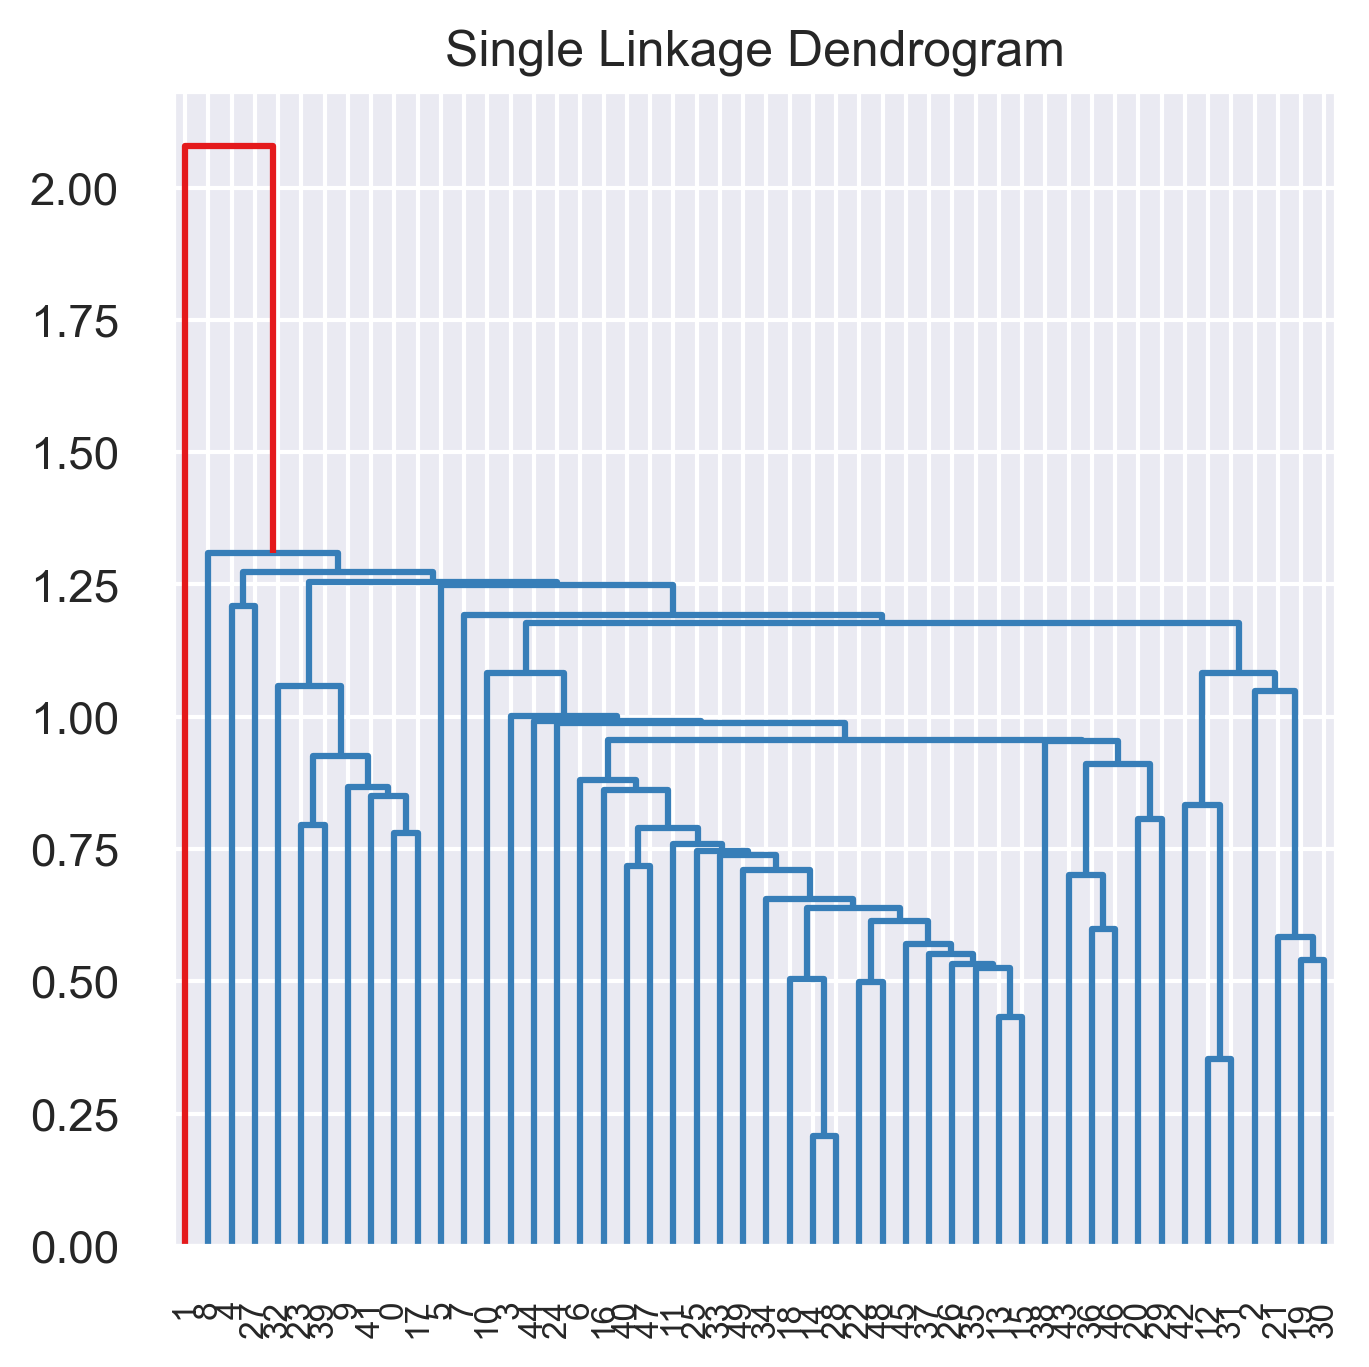

In [105]:
lk = hierarchy.linkage(x, method='single')
hierarchy.dendrogram(lk)
plt.title('Single Linkage Dendrogram')
plt.show()

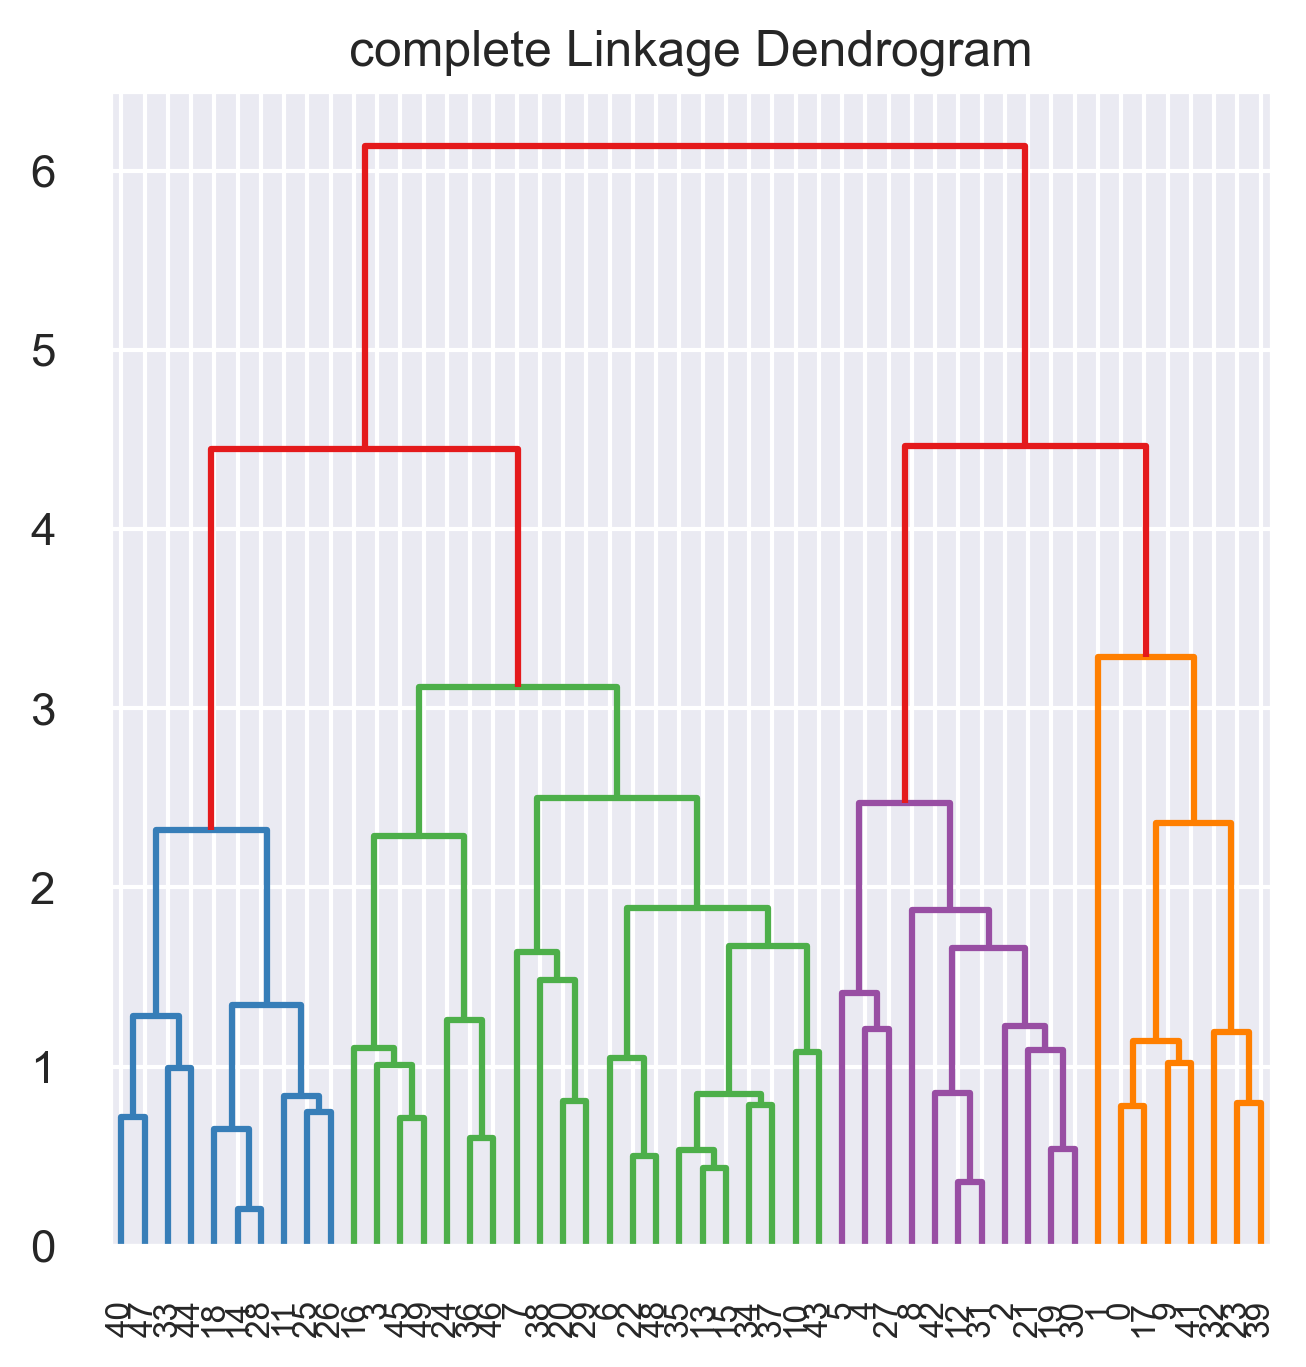

In [106]:
lk = hierarchy.linkage(x, method='complete')
hierarchy.dendrogram(lk)
plt.title('complete Linkage Dendrogram')
plt.show()

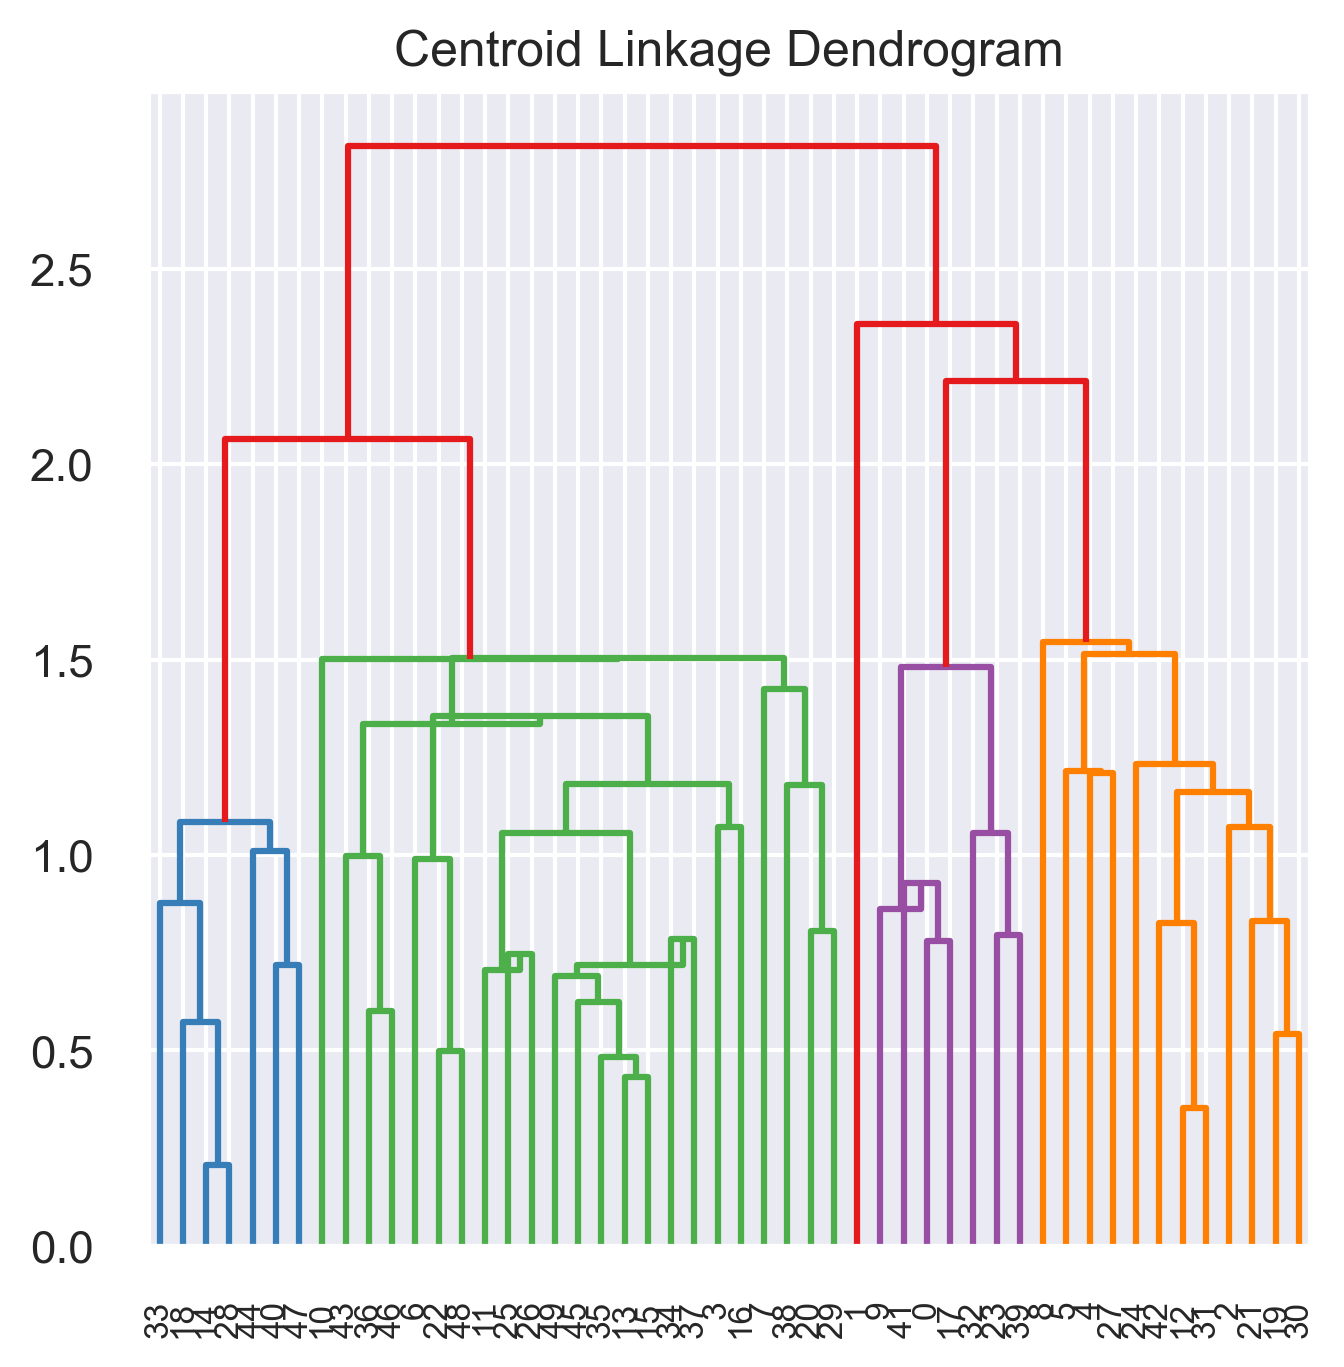

In [107]:
lk = hierarchy.linkage(x, method='centroid')
hierarchy.dendrogram(lk)
plt.title('Centroid Linkage Dendrogram')
plt.show()

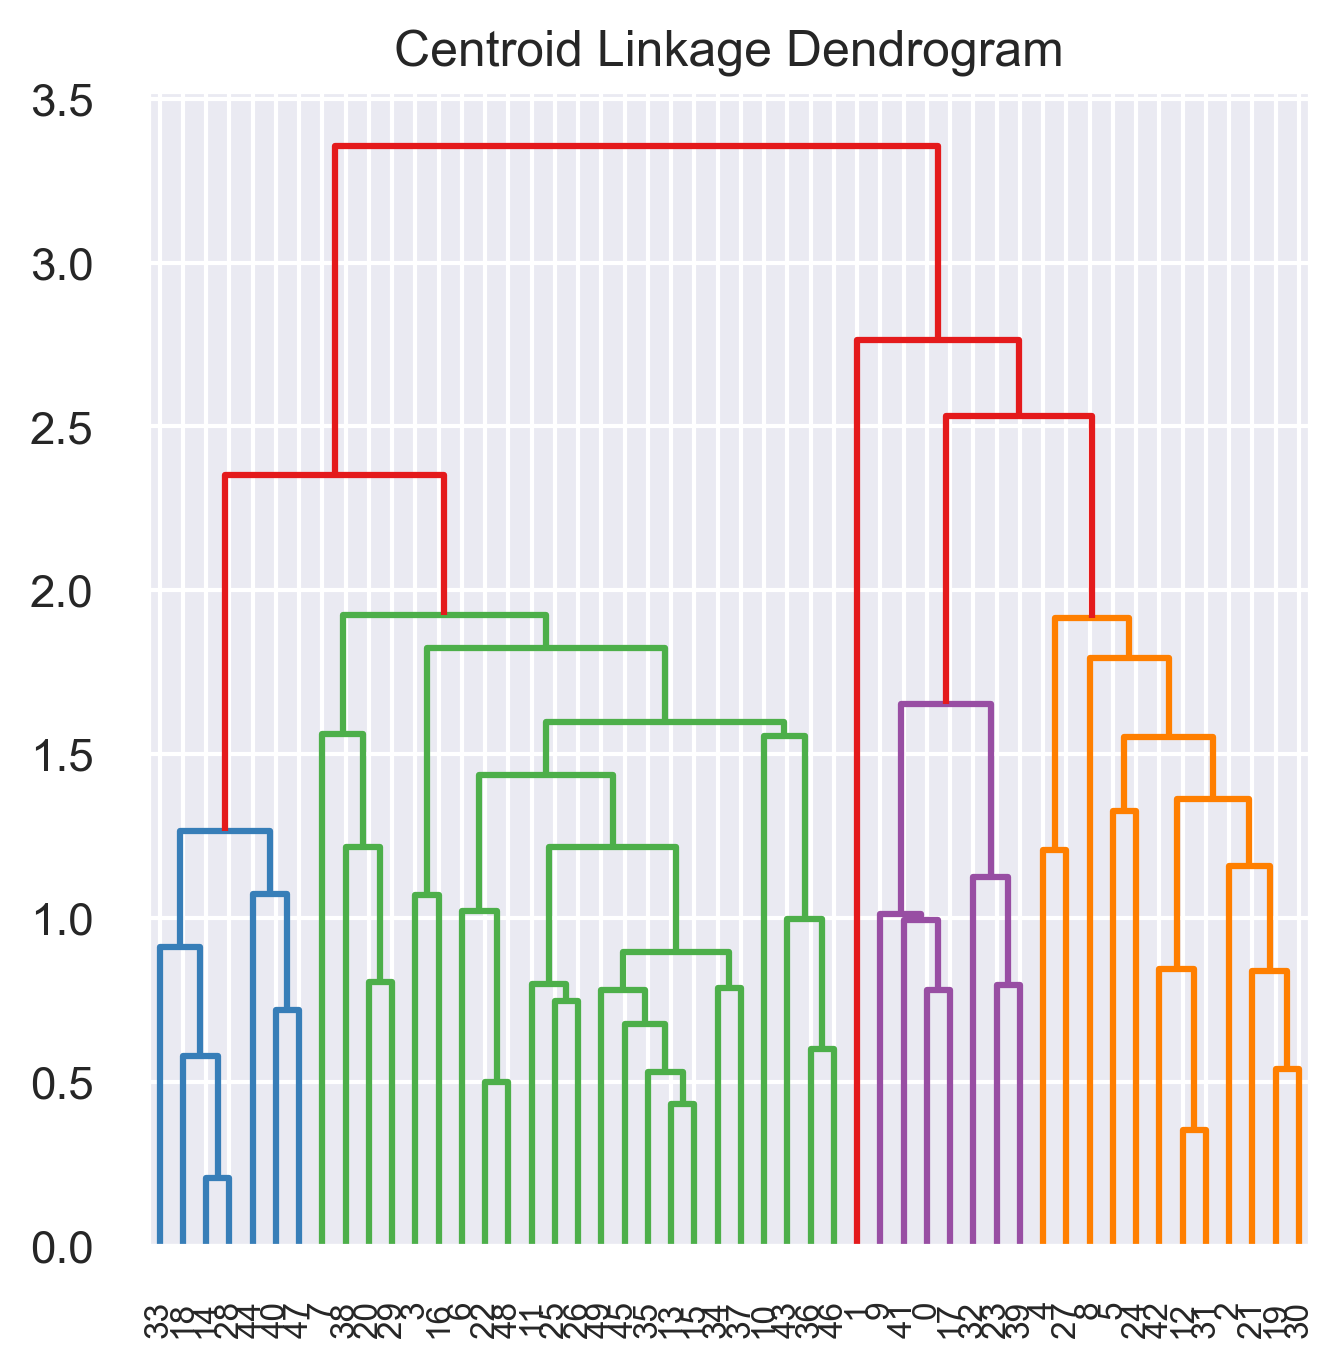

In [108]:
lk = hierarchy.linkage(x, method='average')
hierarchy.dendrogram(lk)
plt.title('Centroid Linkage Dendrogram')
plt.show()

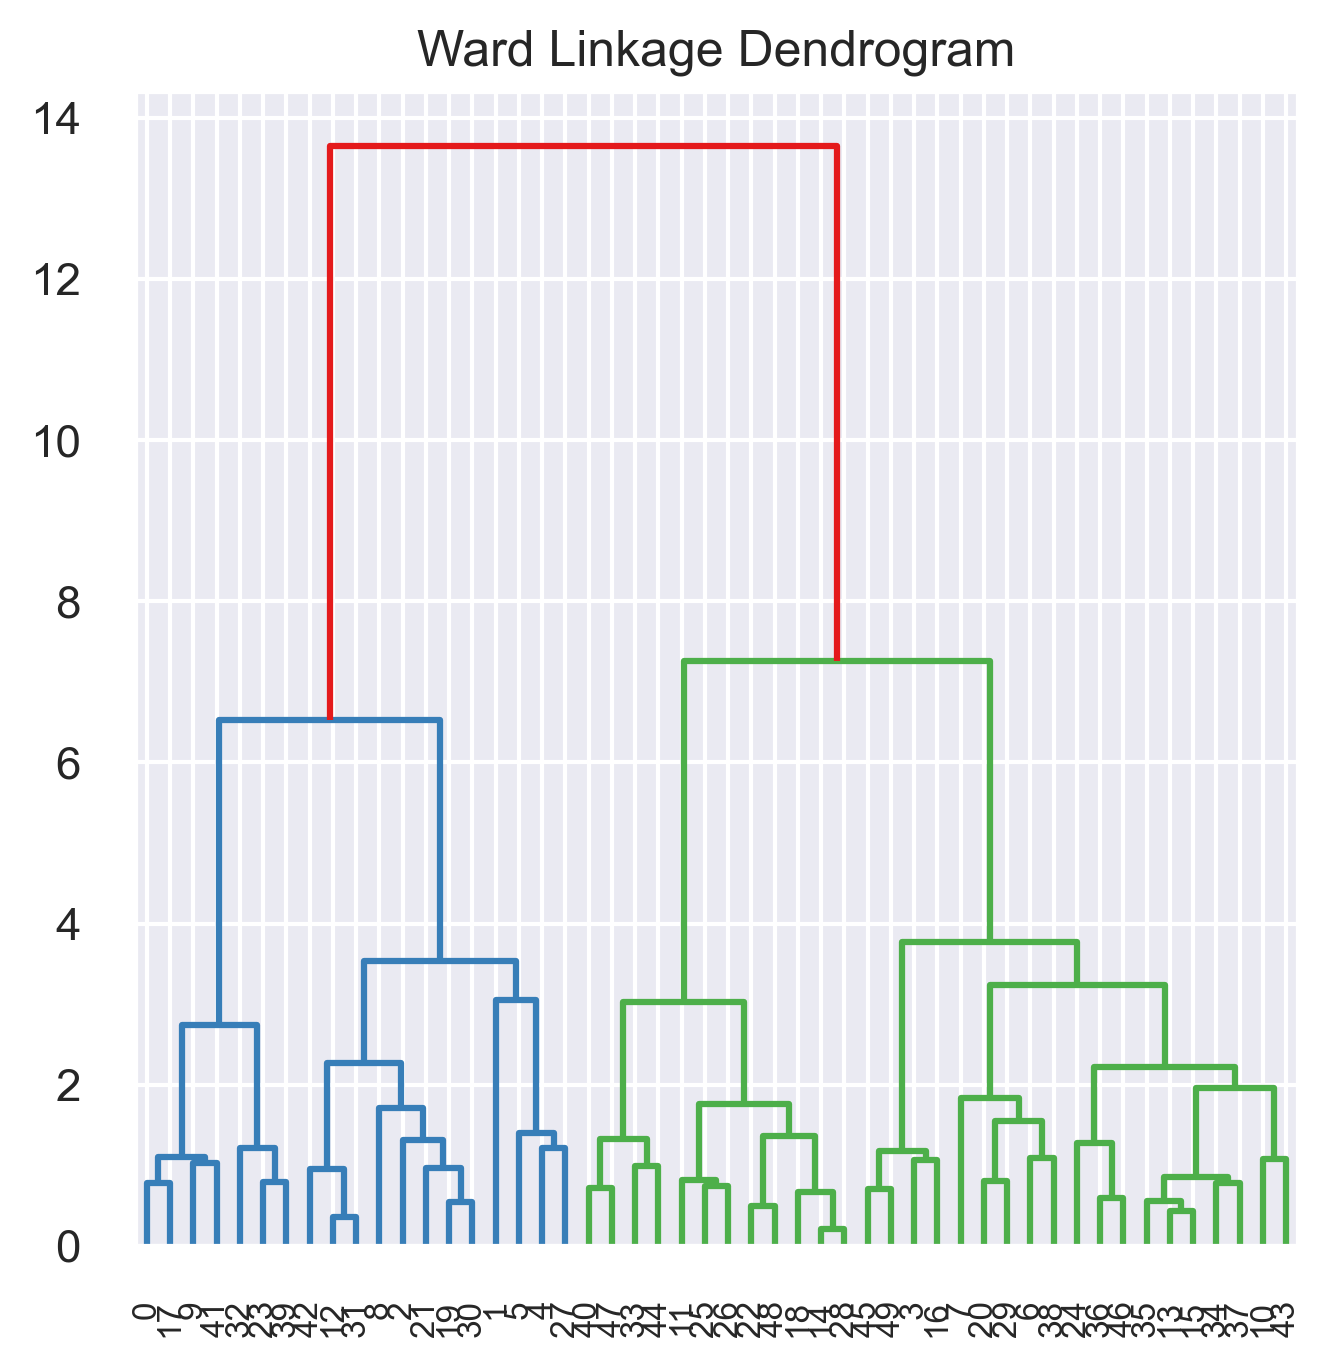

In [109]:
lk = hierarchy.linkage(x, method='ward')
hierarchy.dendrogram(lk)
plt.title('Ward Linkage Dendrogram')
plt.show()

In [110]:
# creating a model with hyperparameter - number of cluster = 3, affinity = 'euclidean', linkage = ward
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
# fit & predict to have cluster labels
hc_pred = hc.fit_predict(x)

In [111]:
hc_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [112]:
# ftiitng k-means model on multiple values of K and finding its wcss(with cluster sum of sqaured variance)

wcss = []
k = range(1,11)
for i in  k:
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[200.0,
 104.96163315756871,
 80.11564032835878,
 57.55425863091104,
 50.07455380829823,
 44.79027614402311,
 39.372866038459776,
 36.606928462016704,
 31.24141485437194,
 28.45457454268821]

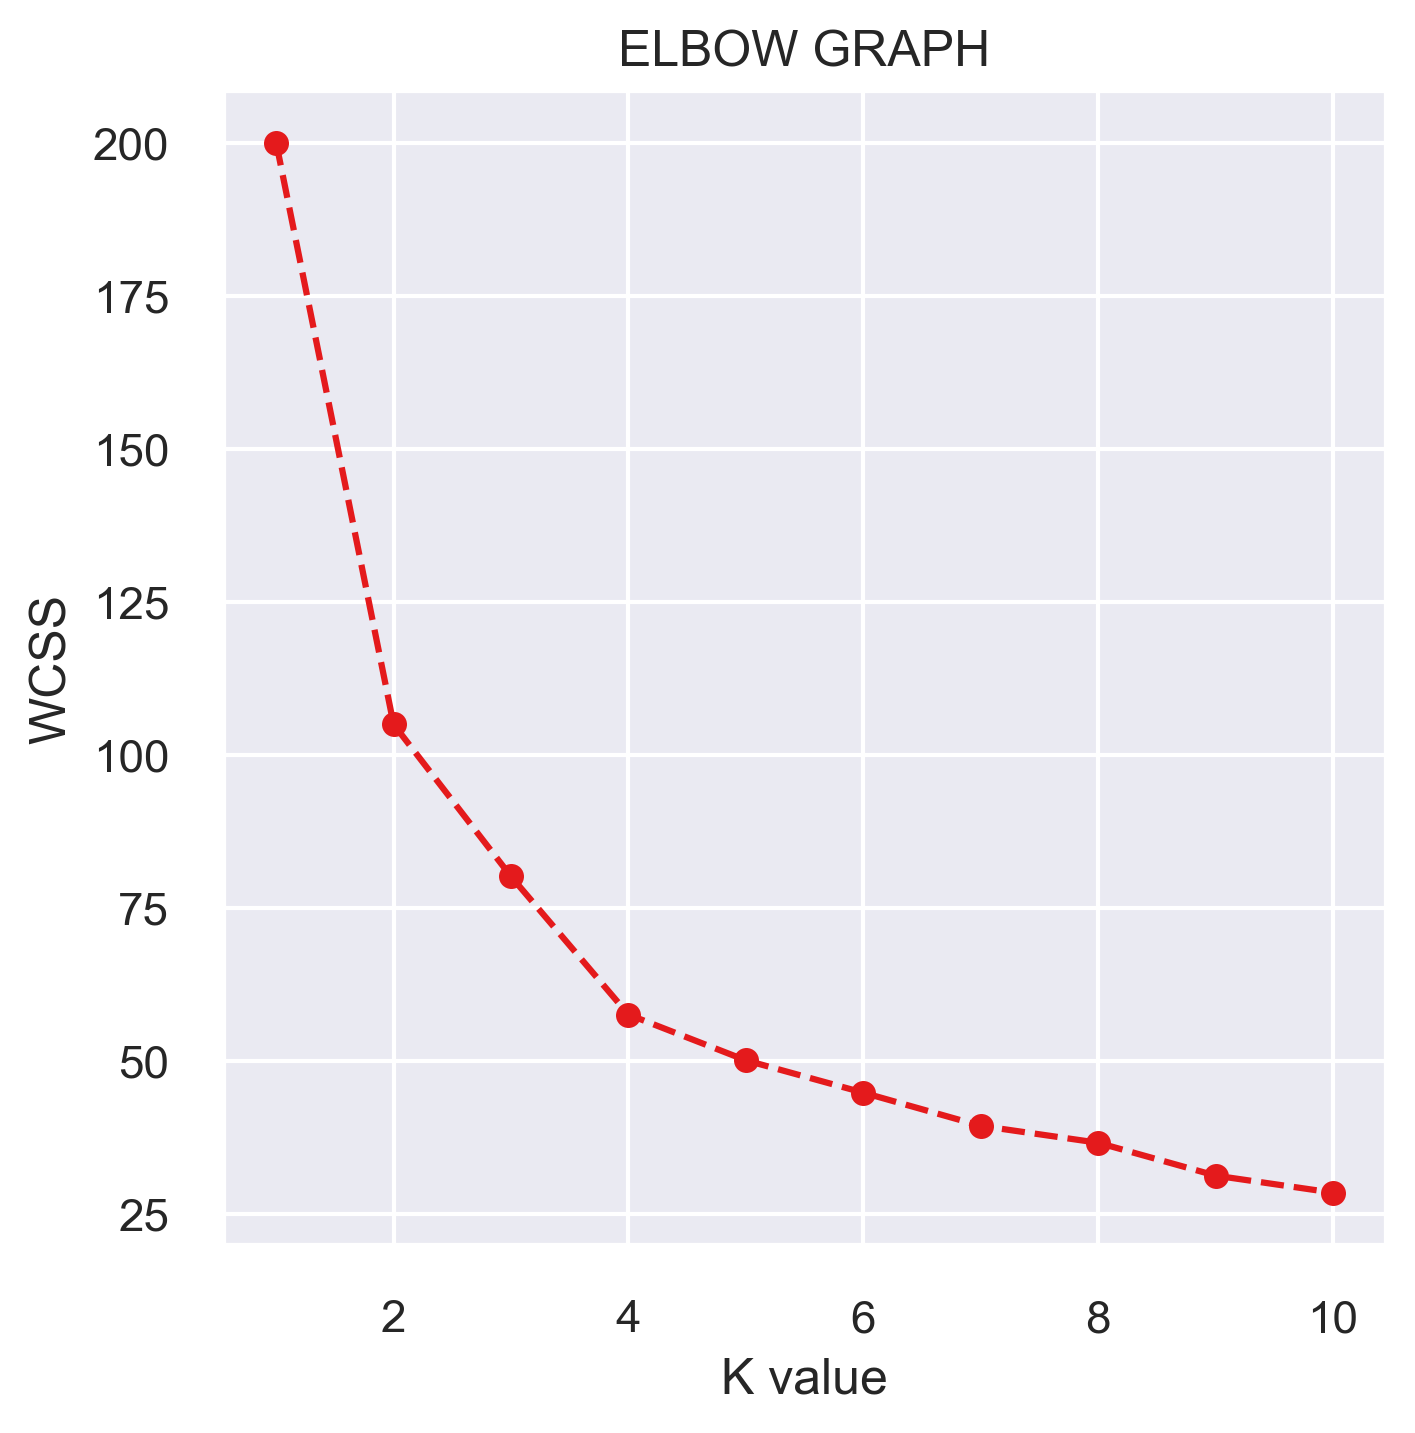

In [113]:
plt.plot(k, wcss, 'o--')
plt.title('ELBOW GRAPH')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

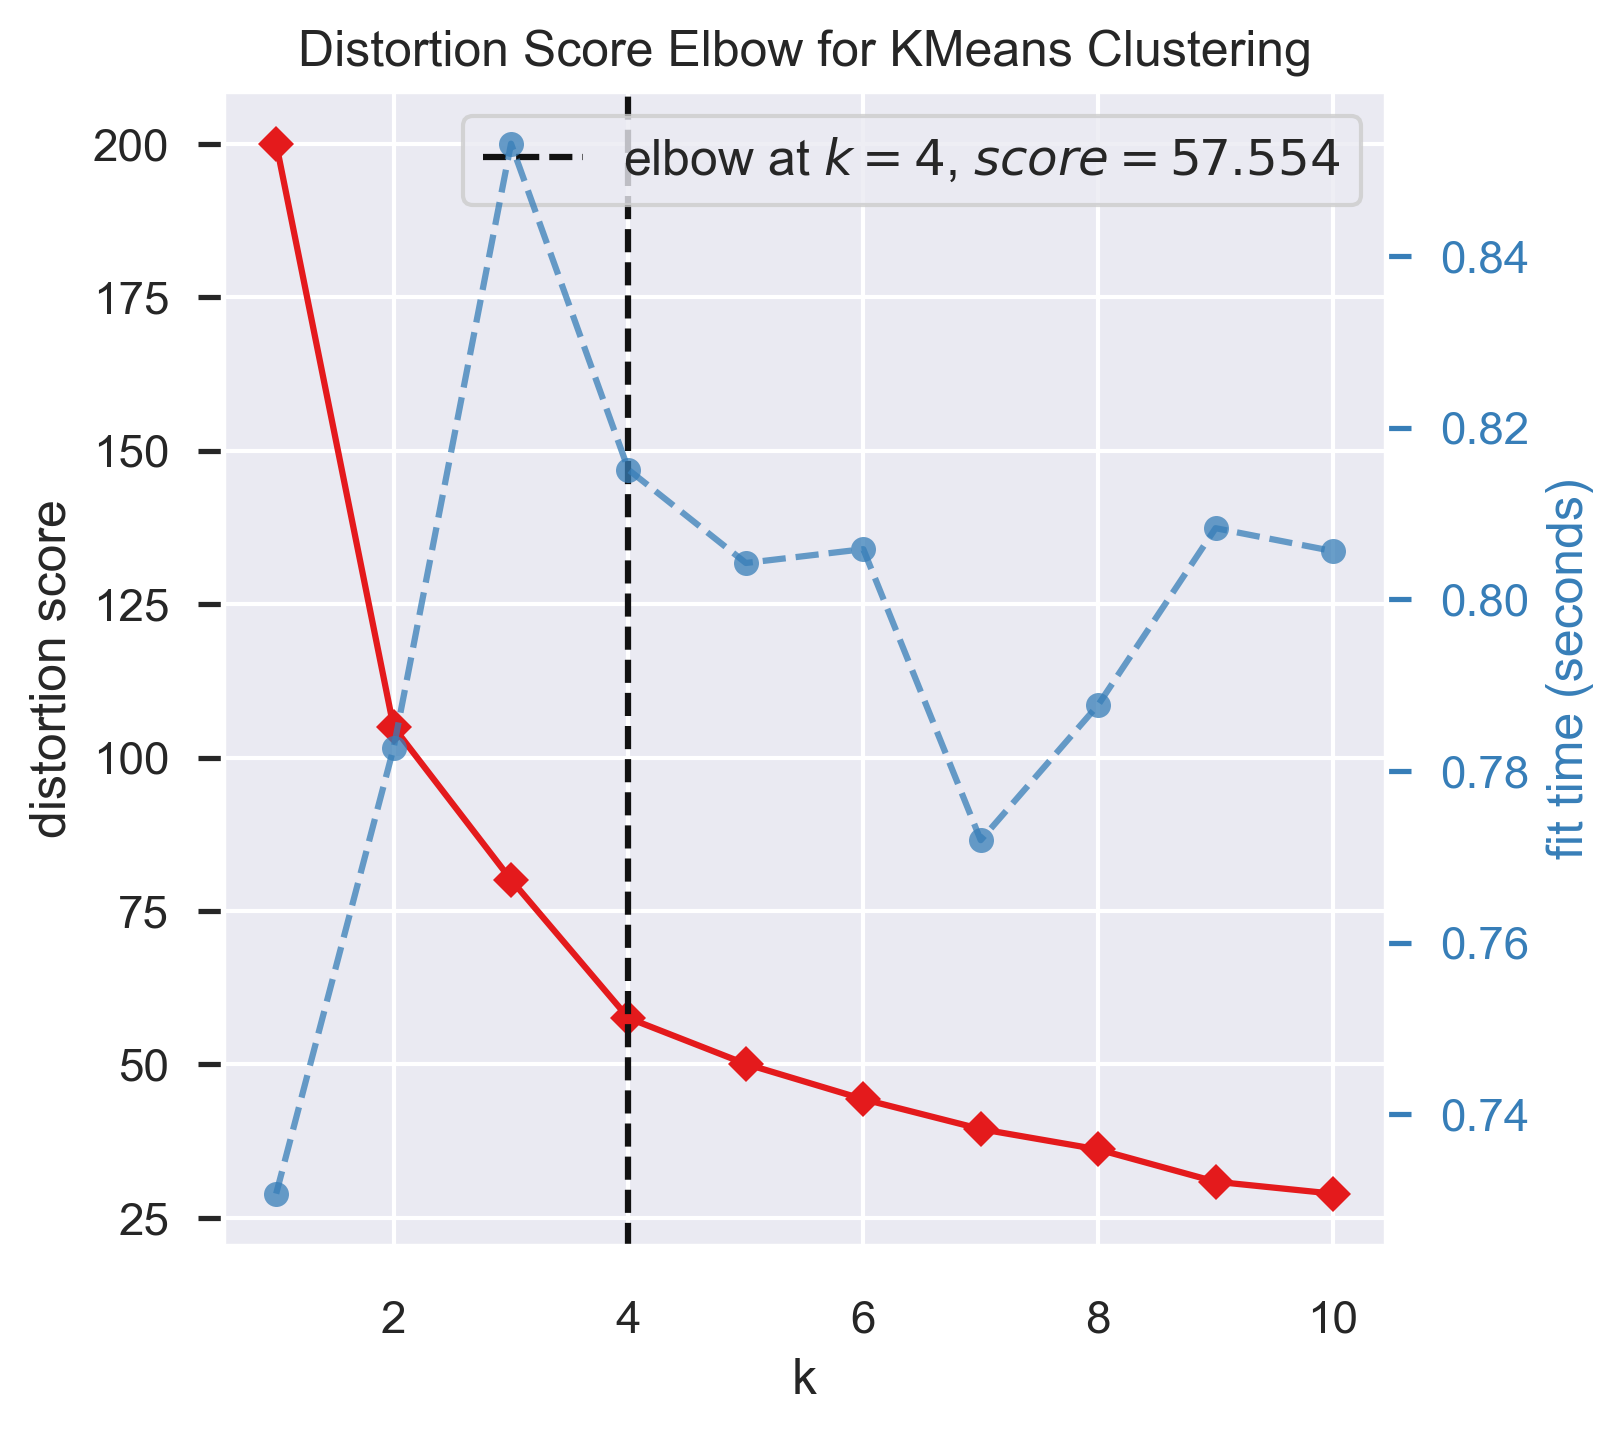

In [114]:
# alternative to elbow graph to find the optimal value of K
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,11))
visualizer.fit(x)
visualizer.poof()
plt.show()

In [115]:
lk = KneeLocator(k, wcss, curve='convex', direction='decreasing')
lk.elbow

4

In [116]:
final_kmean = KMeans(n_clusters=4)
km_pred = final_kmean.fit_predict(x)
km_pred

array([1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0,
       2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 3])

In [117]:
final_kmean.labels_

array([1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0,
       2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 3])

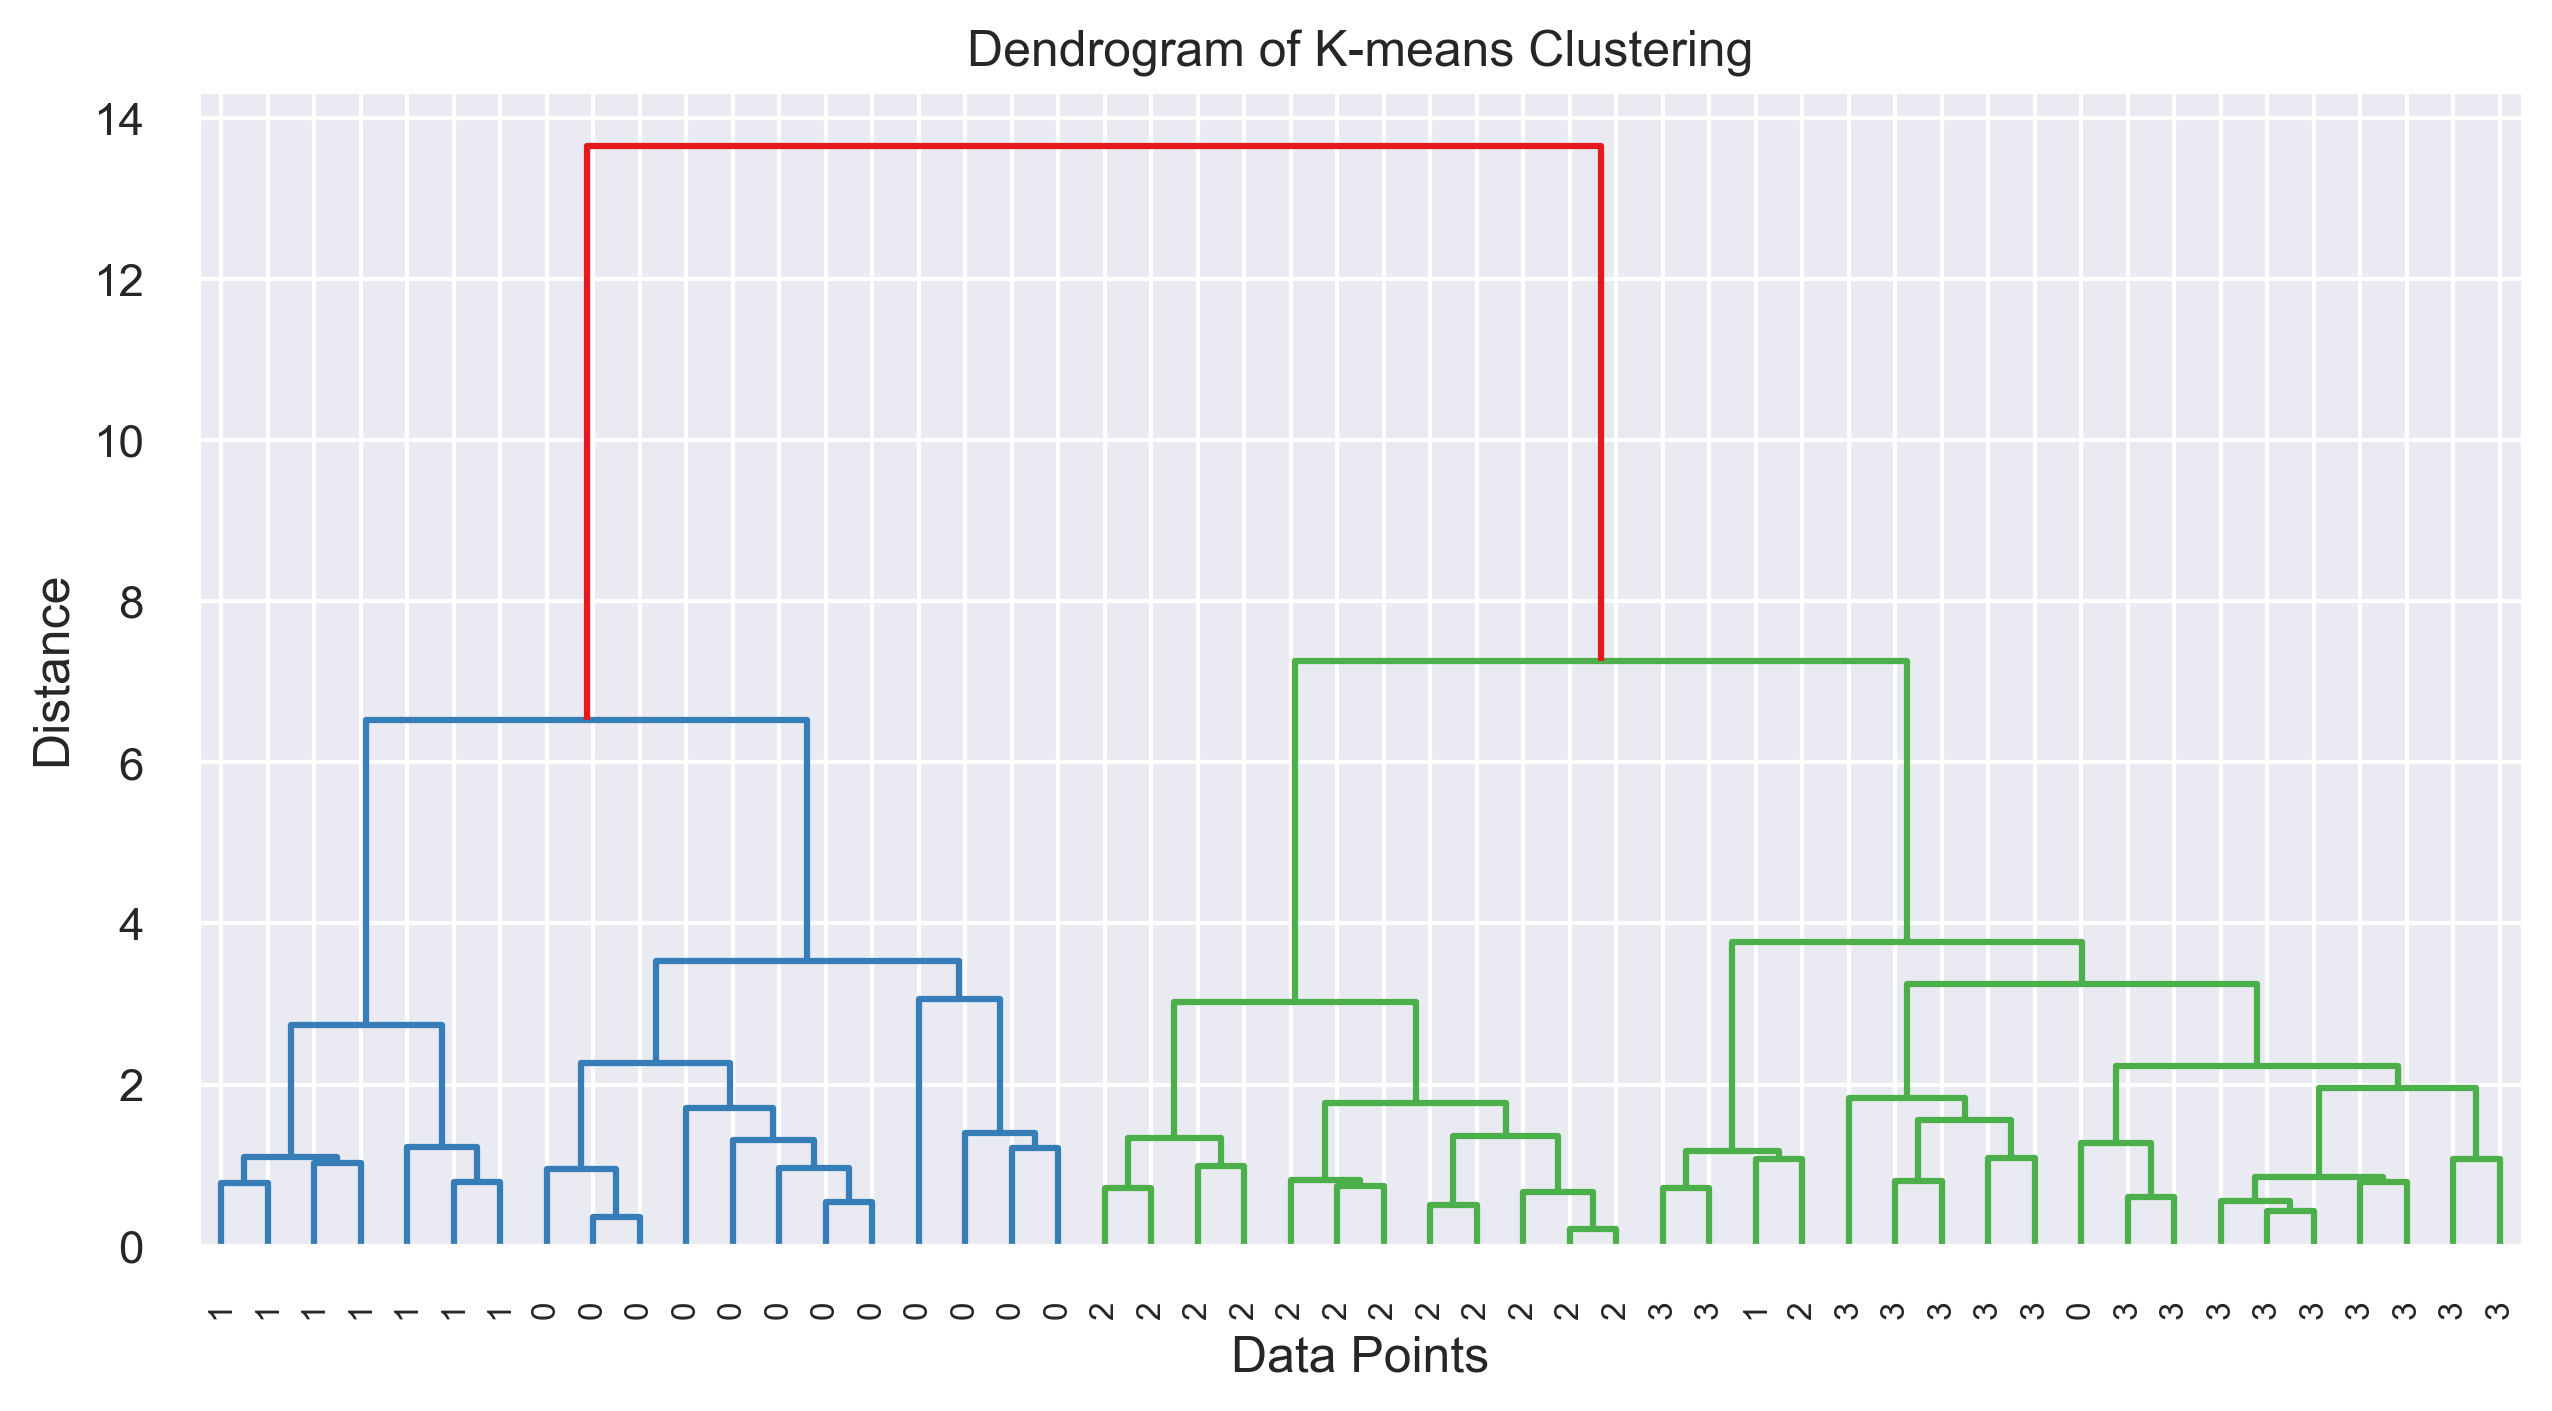

In [118]:
linkage_matrix = hierarchy.linkage(x, 'ward')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(linkage_matrix, labels=km_pred)
plt.title('Dendrogram of K-means Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [119]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
dbscan2.fit(x)

DBSCAN(eps=0.98, min_samples=3)

In [120]:
dbscan2.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [121]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

In [122]:
crimes4 = pd.concat([df,c2],axis=1)
crimes4

State  Murder  Assault  UrbanPop  Rape  Cluster ID
0          Alabama    13.2      236        58  21.2           0
1           Alaska    10.0      263        48  44.5          -1
2          Arizona     8.1      294        80  31.0          -1
3         Arkansas     8.8      190        50  19.5          -1
4       California     9.0      276        91  40.6          -1
5         Colorado     7.9      204        78  38.7          -1
6      Connecticut     3.3      110        77  11.1           1
7         Delaware     5.9      238        72  15.8          -1
8          Florida    15.4      335        80  31.9          -1
9          Georgia    17.4      211        60  25.8           0
10          Hawaii     5.3       46        83  20.2          -1
11           Idaho     2.6      120        54  14.2           1
12        Illinois    10.4      249        83  24.0           2
13         Indiana     7.2      113        65  21.0           1
14            Iowa     2.2       56        57  11.3           1
15          Kansas     6.0      115        66  18.0           1
16        Kentucky     9.7      109        52  16.3           1
17       Louisiana    15.4      249        66  22.2           0
18           Maine     2.1       83        51   7.8           1
19        Maryland    11.3      300        67  27.8           3
20   Massachusetts     4.4      149        85  16.3           1
21        Michigan    12.1      255        74  35.1           3
22       Minnesota     2.7       72        66  14.9           1
23     Mississippi    16.1      259        44  17.1           0
24        Missouri     9.0      178        70  28.2          -1
25         Montana     6.0      109        53  16.4           1
26        Nebraska     4.3      102        62  16.5           1
27          Nevada    12.2      252        81  46.0          -1
28   New Hampshire     2.1       57        56   9.5           1
29      New Jersey     7.4      159        89  18.8           1
30      New Mexico    11.4      285        70  32.1           3
31        New York    11.1      254        86  26.1           2
32  North Carolina    13.0      337        45  16.1          -1
33    North Dakota     0.8       45        44   7.3           1
34            Ohio     7.3      120        75  21.4           1
35        Oklahoma     6.6      151        68  20.0           1
36          Oregon     4.9      159        67  29.3           1
37    Pennsylvania     6.3      106        72  14.9           1
38    Rhode Island     3.4      174        87   8.3           1
39  South Carolina    14.4      279        48  22.5           0
40    South Dakota     3.8       86        45  12.8           1
41       Tennessee    13.2      188        59  26.9           0
42           Texas    12.7      201        80  25.5           2
43            Utah     3.2      120        80  22.9           1
44         Vermont     2.2       48        32  11.2          -1
45        Virginia     8.5      156        63  20.7           1
46      Washington     4.0      145        73  26.2           1
47   West Virginia     5.7       81        39   9.3           1
48       Wisconsin     2.6       53        66  10.8           1
49         Wyoming     6.8      161        60  15.6           1

In [123]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
db_pred = dbscan2.fit_predict(x)

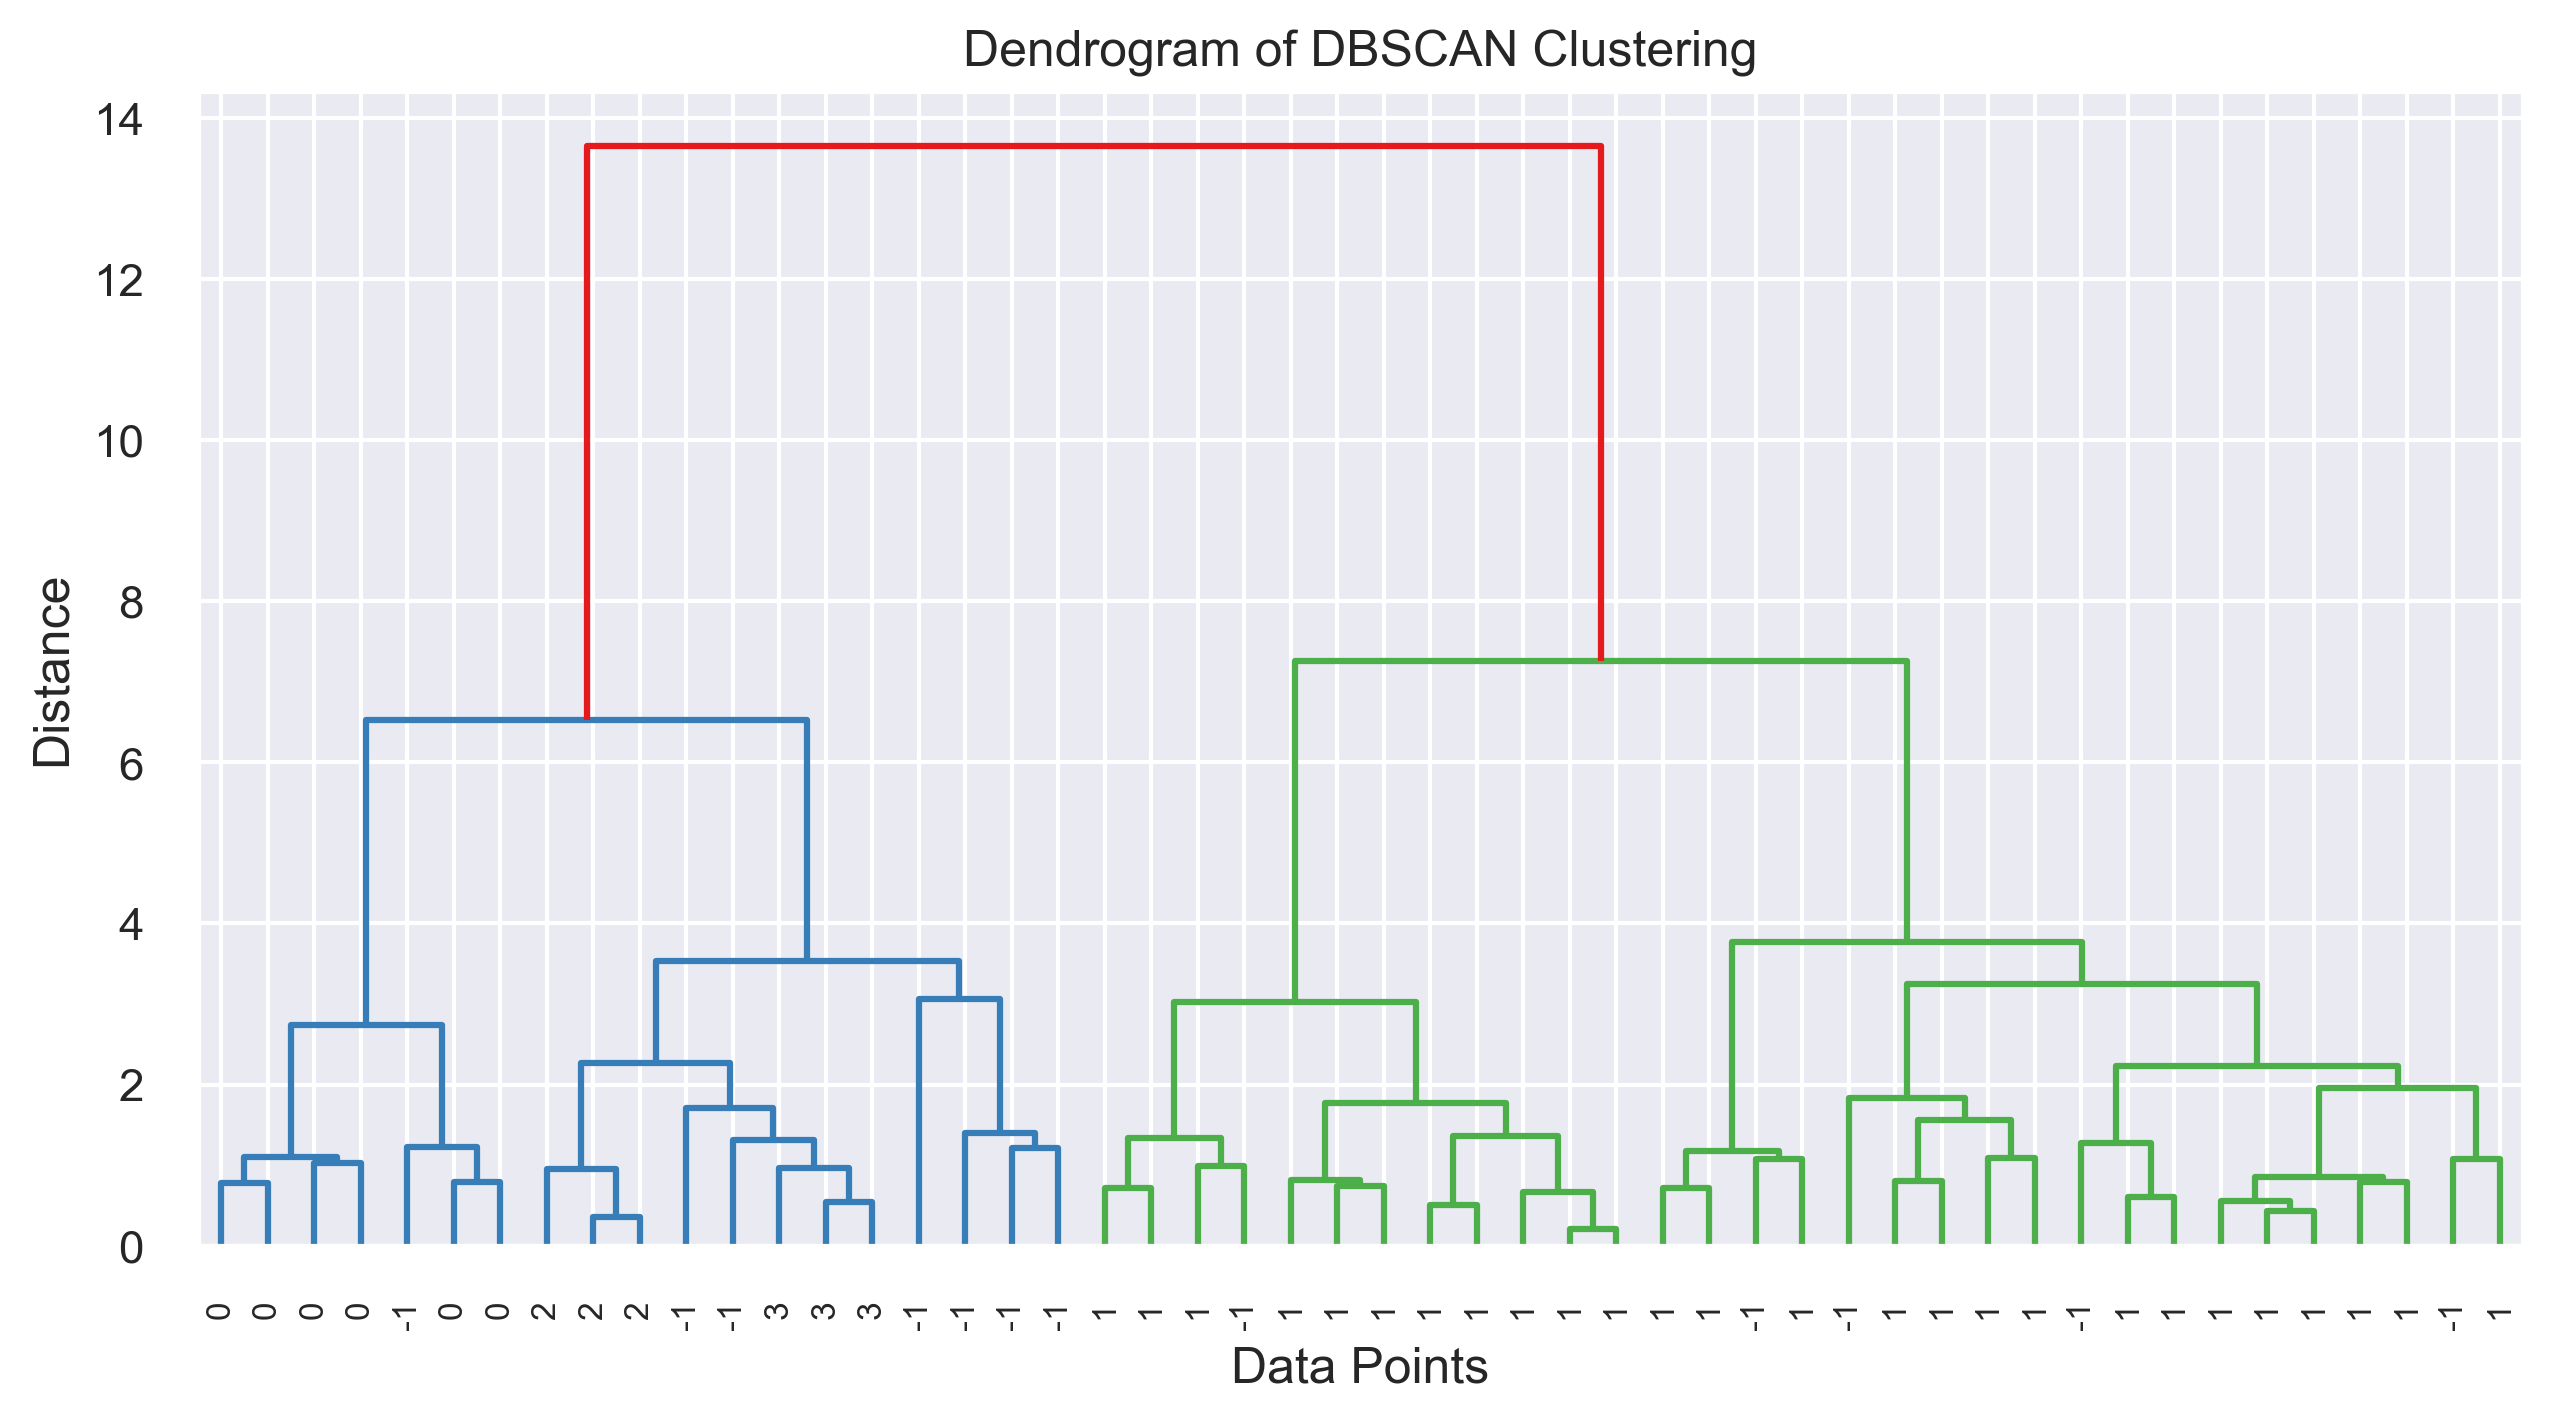

In [125]:
linkage_matrix = hierarchy.linkage(x, 'ward')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(linkage_matrix, labels=db_pred)
plt.title('Dendrogram of DBSCAN Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()